In [2]:
import csv
import numpy as np 
import random
import time
# sve_ivp
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
# from Update_LM_functions import calculate_constraints, update_lambda, openfile

on_mac = True 
on_thinkpad = False 
on_hpg = False

In [3]:


if on_mac == True: 
    data_path = "/Volumes/hodaakl/"
if on_thinkpad== True: 
    data_path = "//exasmb.rc.ufl.edu/blue/pdixit/hodaakl/"
if on_hpg == True: 
    data_path = "/blue/pdixit/hodaakl/"

# specify the project you are working on     
spec_folder = data_path + 'A5MCMC_IGF_FoxO/'

In [4]:
# import os
# os.listdir(spec_folder)

In [5]:

folder_out ='0413_Constrained/' #    Lambda = old_lambda.copy() + alpha_arr*(Error)/true_constraints


In [7]:

def Csv_to_Np(index = 0, dat = 'cellpreds' , path = spec_folder + folder_out ): 
    if dat == 'cellpreds':
        fn = path + f'cellpreds_{index}.csv'
    if dat == 'moments':
        fn = path + f'moments_{index}.csv'
    if dat == 'lambdas':
        fn = path + f'Lambdas.csv'
    if dat == 'params': 
        fn = path + f'params_{index}.csv'  
    if dat == 'variance': 
        
        fn = path + f'variance_{index}.csv'
    
    df = pd.read_csv(fn, sep = ',', header = None) 
    
    table = df.to_numpy()
    return table
    

In [8]:
# for i in range(20):
#     moments_0 = Csv_to_Np(index = i,dat = 'cellpreds', path = spec_folder + folder_out)
#     print(moments_0[0,:])

In [9]:
path = spec_folder + folder_out
err_fn = path +  'Errors.csv'

acc_fn = path + 'AccRatio.csv'
lambda_fn = path + 'Lambdas.csv'
# read_dictionary = np.load(spec_folder+'Arrays_for_max_ent/cons_dict_mu_lnx_fraclr_020322.npy',allow_pickle='TRUE').item()
# real_cons = read_dictionary['array']
# ncons = len(real_cons)
# cons_title = read_dictionary['labels']
df = pd.read_csv(err_fn, sep = ',', header = None , ) 
err_np = df.to_numpy()
df_l = pd.read_csv(lambda_fn, sep = ',', header = None)
lambda_np = df_l.to_numpy()




In [10]:
print(lambda_np.shape)

(60, 252)


(59, 252)
(60, 252)


Text(0.5, 0, 'Iteration')

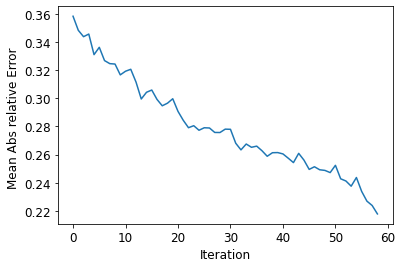

In [11]:
import os 

if os.path.isdir('figs')==False:
    os.mkdir('figs')
    
LatestIterI = lambda_np.shape[0] -2
print(err_np.shape)
print(lambda_np.shape)
lambda_np.shape
rc_m= .1
# print(rc_m.shape)
mean_err = np.mean(abs(err_np), axis = 1)
# mean_err.shape
real_abs = abs(err_np/rc_m)
mean_rel_abs = np.mean(real_abs, axis = 1)
# mean_err = np.mean(abs(err_np), axis = 1)
plt.plot(range(len(mean_rel_abs) ), mean_rel_abs[:])
plt.ylabel('Mean Abs relative Error ')
plt.xlabel('Iteration')

Text(0.5, 0, 'Iteration')

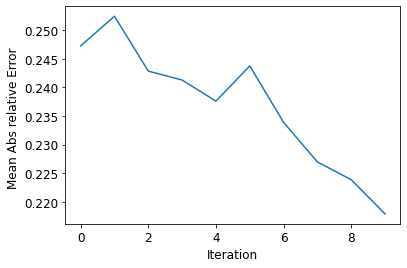

In [12]:
start_iter = -10
y =  mean_rel_abs[start_iter:]
plt.plot(range(len(y)), y)
plt.ylabel('Mean Abs relative Error ')
plt.xlabel('Iteration')

### Plotting parameter distributions 

In [9]:
latest_iteration =err_np.shape[0]-1
moments_np = Csv_to_Np(index = latest_iteration, dat = 'cellpreds', path = path)# , path = spec_folder + '1104_output_Mu/' )
moments_np.shape


OSError: [Errno 5] Input/output error

In [11]:
Best_iteration = np.argmin(mean_rel_abs)
print(Best_iteration)

278


In [11]:
# moments_np = Csv_to_Np(index = latest_iteration, dat = 'cellpreds')# , path = spec_folder + '1104_output_Mu/' )
# moments_np.shape

In [12]:
# I -= 1
param_np = Csv_to_Np(index = Best_iteration, dat = 'params')
param_np.shape

(20315, 14)

In [13]:
# mod = .25
par_dict = {'par_name': ['k1', 'k2','k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12', 'k_tot_Akt', 'k_tot_foxo']
            , 'low_lim_log':np.array([2.75,-3.5,-2.25,-0.5,-0.75,-0.75,-3.5,-6.75,-6,-3.75,-2.25,-3,4.25,2])
            , 'high_lim_log': np.array([4.25,-2,-0.75,1,0.75,0.75,-2,-5.25,-4.5,-2.25,-0.75,-1.5,5.75,3.5])
            , 'identifier': ['Receptor count ', 'Degredation of IGFR','Binding of IGFR to IGF','Unbinding IGFR to IGF ',
                      'Phosphorylation of bound receptor',  'Dephosphorylation of bound receptor ', 'Dephosphorylation of AKT',
                         'Phosphorylation of AKT', 'Phosphorylation of FoxO', 'Dephosphorylation of FoxO', 'Influx of FoxO to nucleus ',
                         'Efflux of FoxO from nucleus', 'k_tot_Akt', 'k_tot_foxo']}

In [14]:
# param_np = Csv_to_Np(index = 20, dat = 'params')
# x = ((10**(param_np[:,10]))/ (10**param_np[:,11] + 10**(param_np[:,10])) )* 10** param_np[:,-1]
# plt.hist(x)

In [15]:
param_np.shape

(20315, 14)

In [16]:
lambda_np[-5,:]

array([ 0.5232827 ,  0.15268775,  0.20015815,  0.08134951, -0.02873586,
       -0.05333588,  0.31876568,  0.48024278,  0.28290881,  0.21260792,
       -0.10586217, -0.28889144, -0.28246267,  0.09676285,  0.59108008,
       -0.01062086,  0.1342786 , -0.25269982, -0.55920898, -0.49762117,
       -0.13785036,  0.16657621, -0.06453203,  0.37009761, -0.46856801,
       -0.52267122, -0.13068195,  0.52037491, -0.0098295 , -0.31616144,
       -0.0670706 , -0.07314892, -0.25528472, -0.31554428, -0.15473971,
       -0.01211549, -0.05561233, -0.04348113, -0.36767355, -0.42435002,
       -0.53527234, -0.34305272, -0.01061556, -0.54709005, -0.31327694,
       -0.51716751, -0.741848  , -0.69614921, -0.50481968, -0.10696874,
       -0.57102146, -0.45218077, -0.73919992, -0.72885009, -0.56974948,
       -0.42715841, -0.17940936, -0.26772971, -0.04130647,  0.11559474,
       -0.01888672, -0.10845932, -0.12433396, -0.1694767 , -0.12349011,
        0.04958318, -0.16591629, -0.2278028 , -0.28061336, -0.23

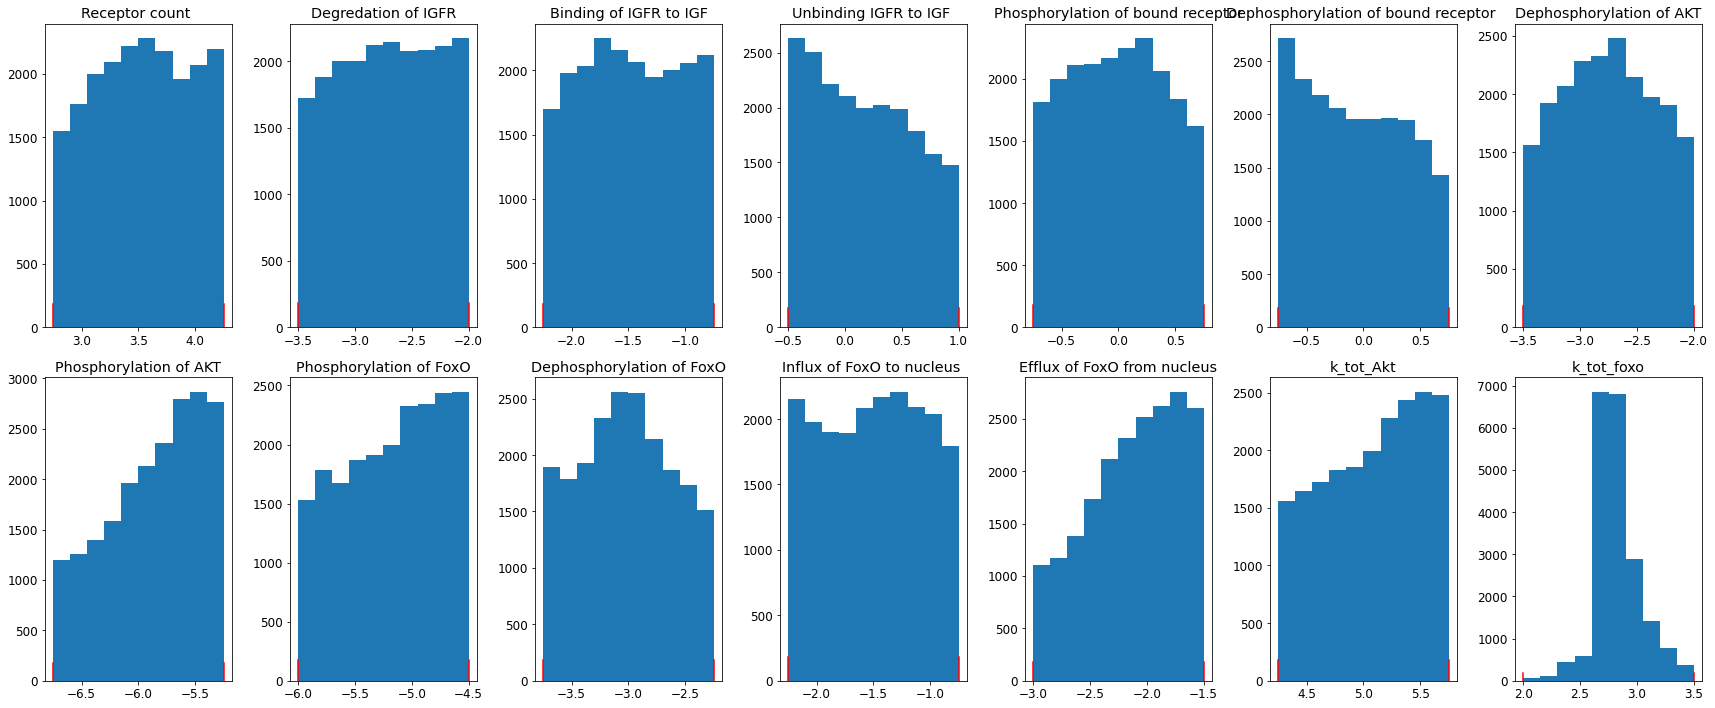

In [17]:
# param_np = Csv_to_Np(index = 15, dat = 'params')

pv = param_np[0,:]
ns, nk = param_np.shape
fig, axs = plt.subplots(2,7, figsize = (24,10))
pi = 0; pj = 0
for i in range(nk):
    axs[pi, pj].hist(param_np[:,i])
    axs[pi, pj].set_title(par_dict['identifier'][i])
    ll = par_dict['low_lim_log'][i]
    lh = par_dict['high_lim_log'][i]
    x_ll = np.ones(10)*ll
    x_lh = np.ones(10)*lh
    # p = np.ones(10)*pv[i]
    y = np.arange(0,200,200/10)
    axs[pi, pj].plot(x_ll, y, c = 'r')
    axs[pi, pj].plot(x_lh, y, c = 'r')
    # axs[pi, pj].plot(p, y, c = 'r')
    
    
    
#     axs[pi, pj].set_xlim([par_dict['low_lim_log'][i],  par_dict['high_lim_log'][i] ])
    pj+= 1
    if pj ==7:
        pj =0 
        pi +=1
    
plt.tight_layout()

In [30]:
param_np[0,:]

array([ 3.5067863 , -3.38978244, -1.81281997,  0.02740936,  0.10325805,
        0.08400311, -3.49783014, -6.61696826, -4.73353823, -3.17914789,
       -0.83173459, -1.75596919,  5.34854729,  2.2631032 ])

### Lambda plot

In [54]:
lambda_np.shape

(209, 252)

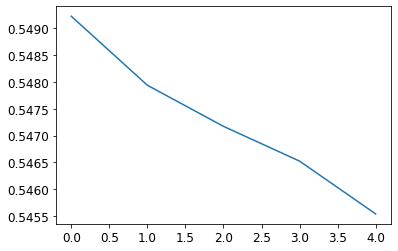

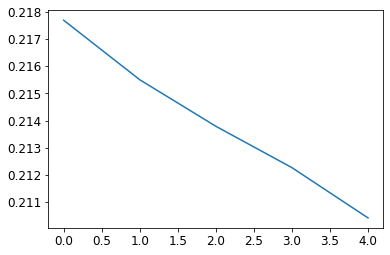

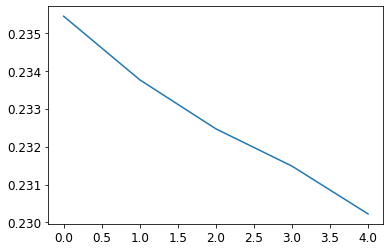

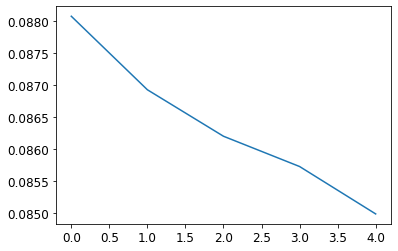

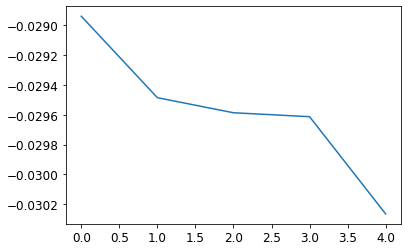

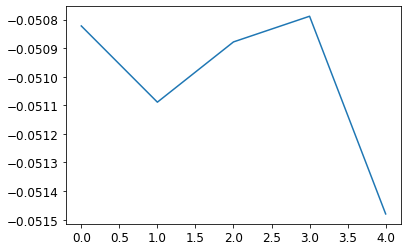

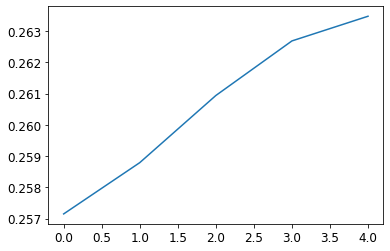

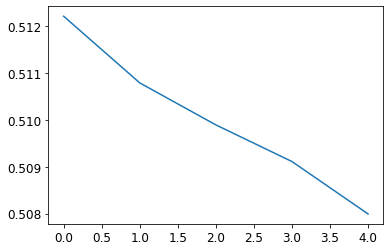

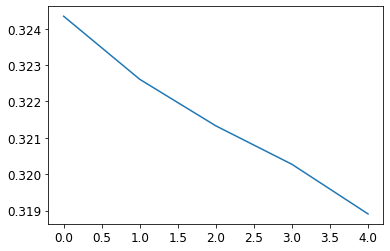

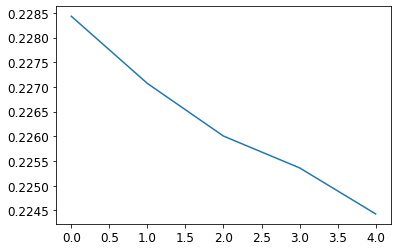

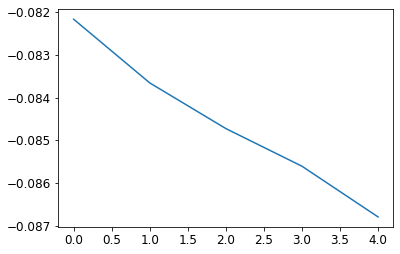

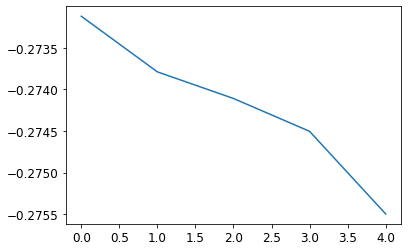

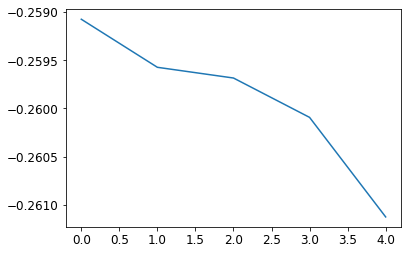

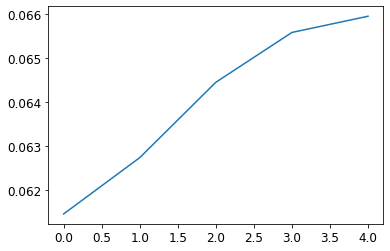

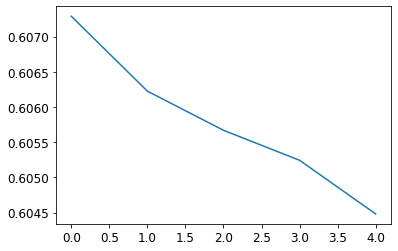

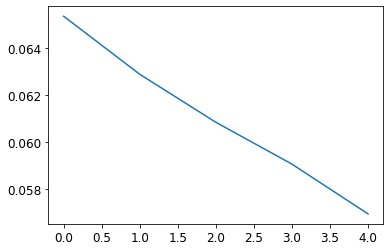

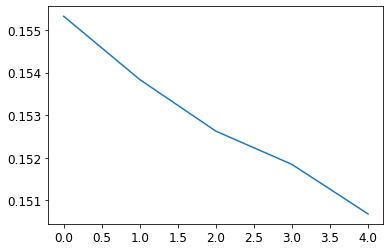

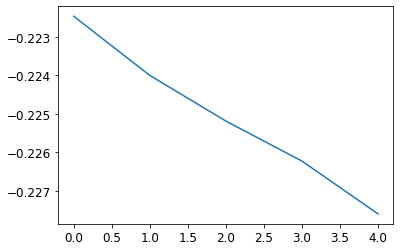

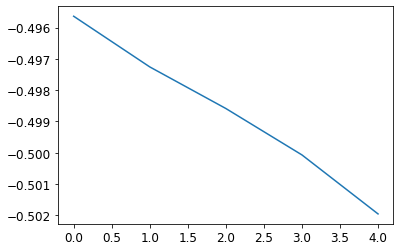

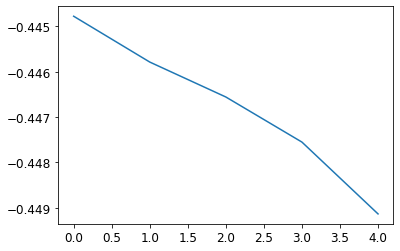

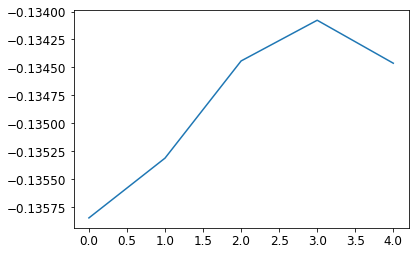

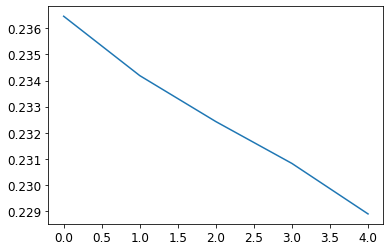

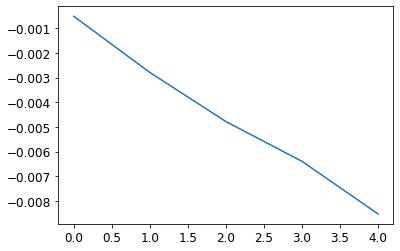

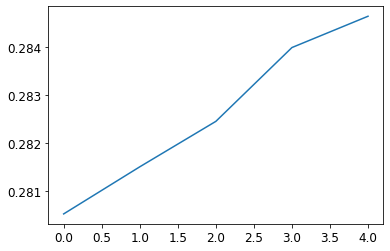

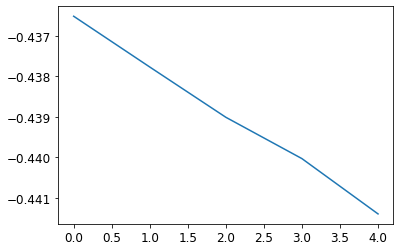

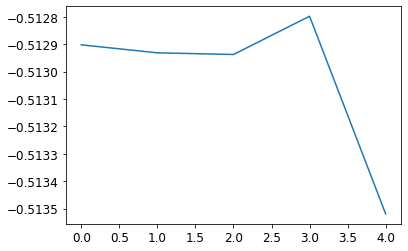

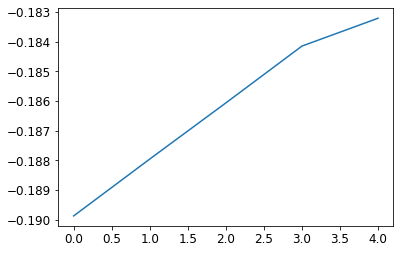

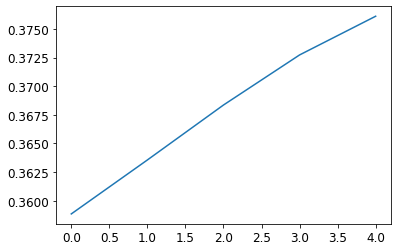

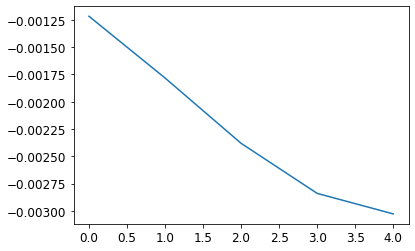

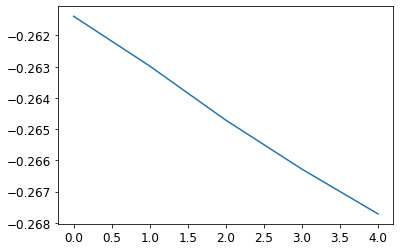

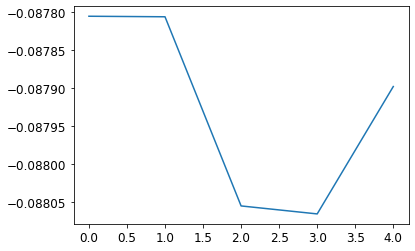

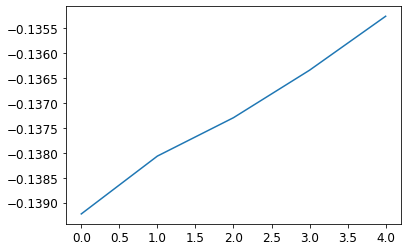

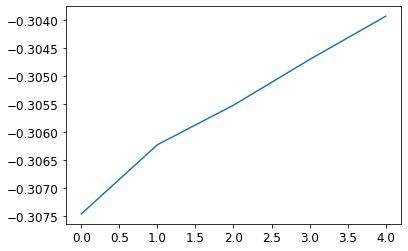

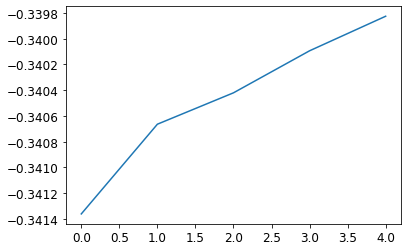

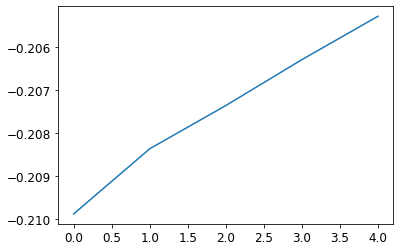

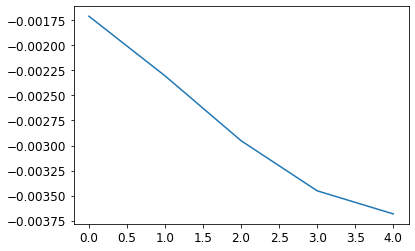

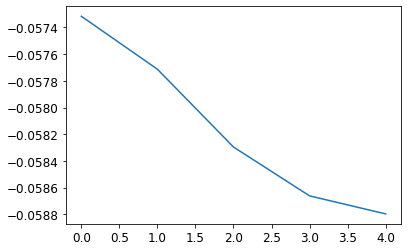

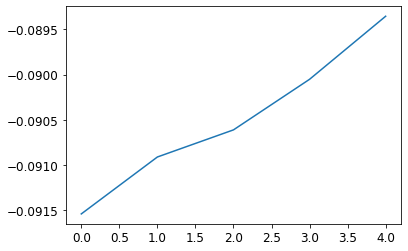

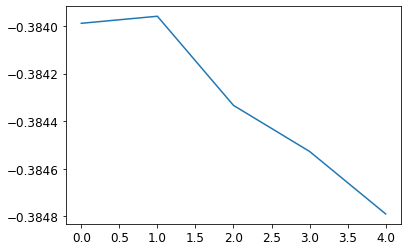

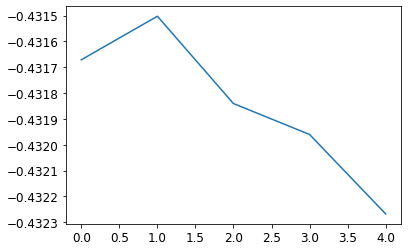

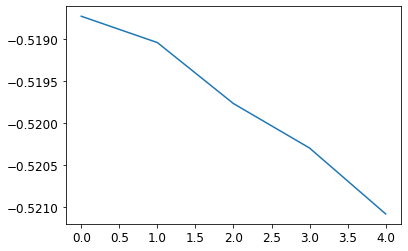

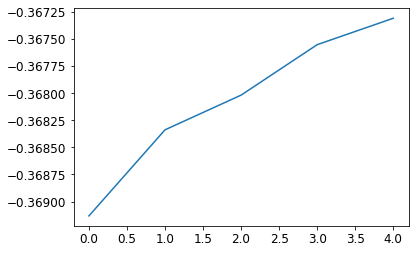

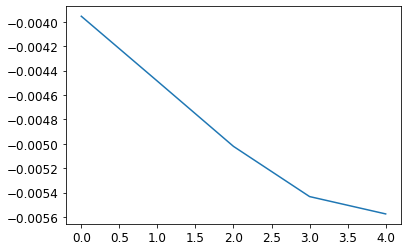

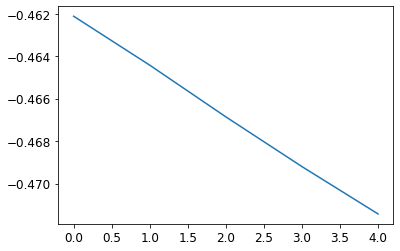

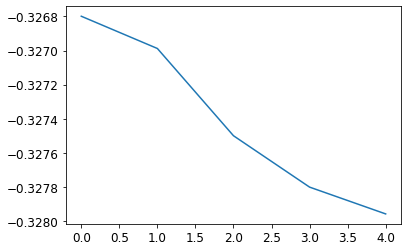

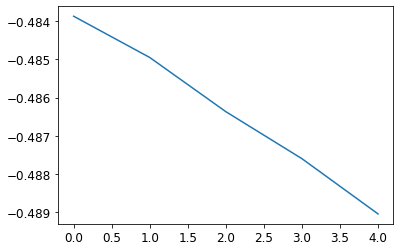

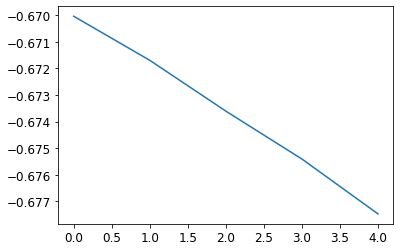

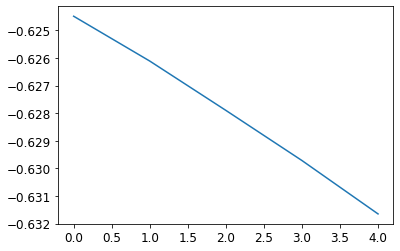

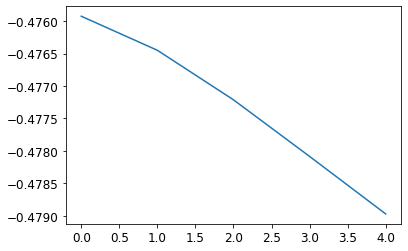

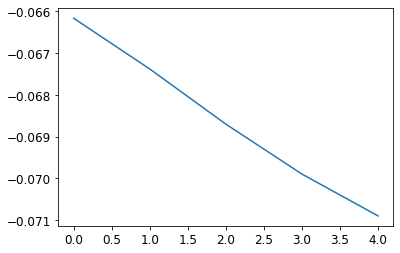

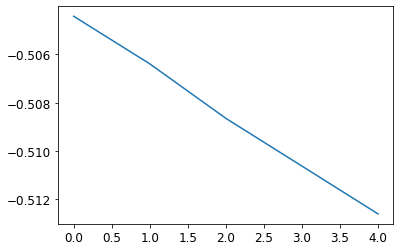

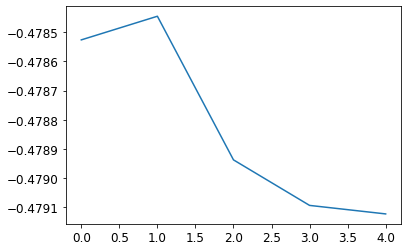

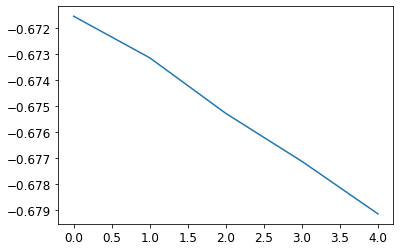

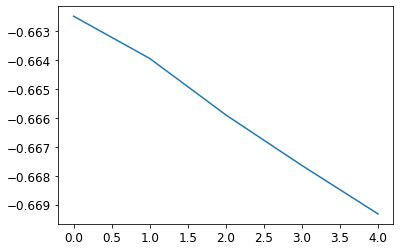

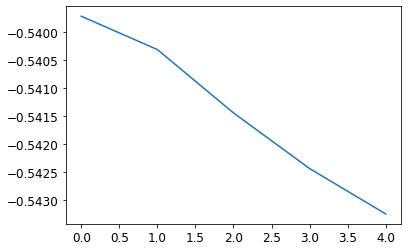

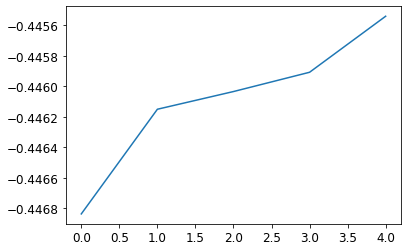

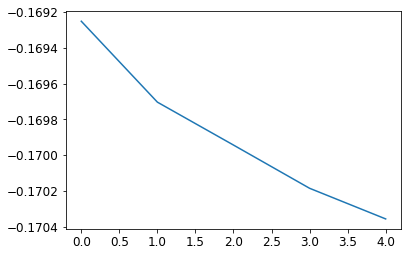

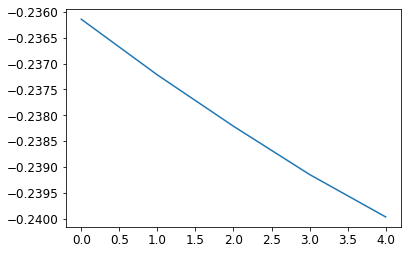

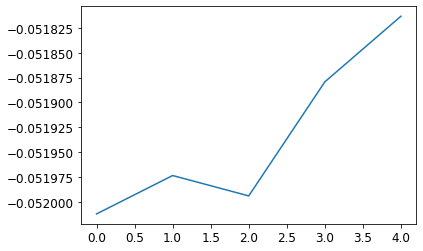

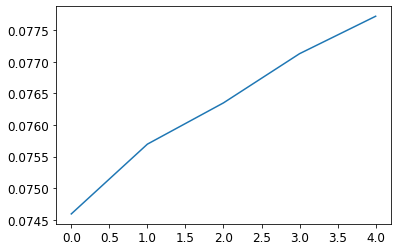

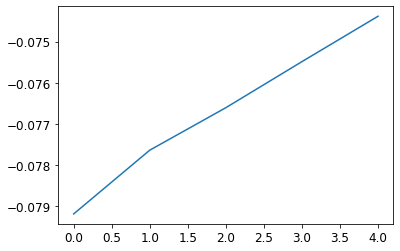

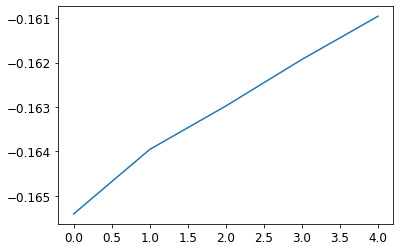

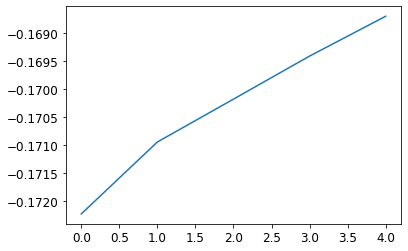

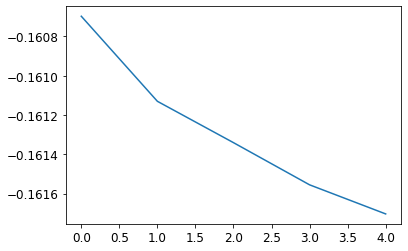

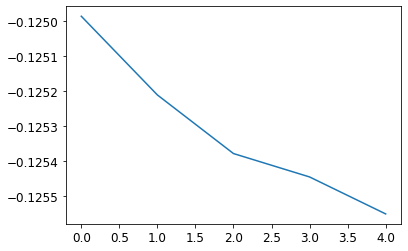

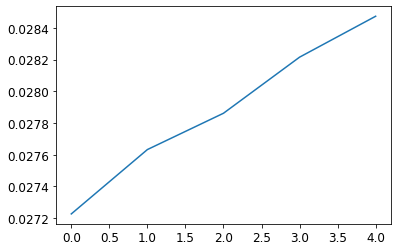

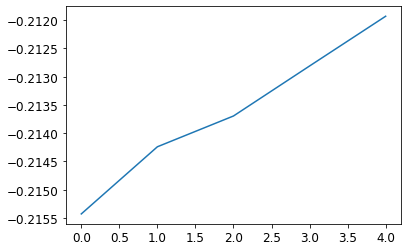

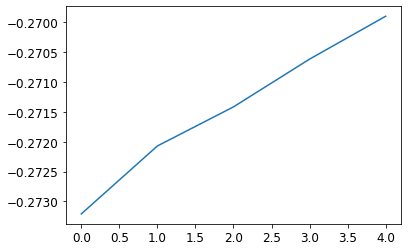

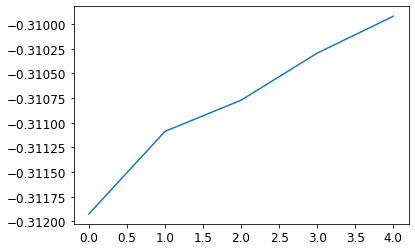

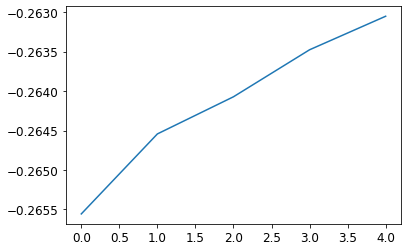

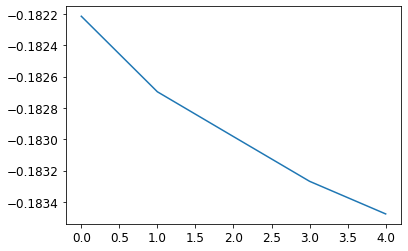

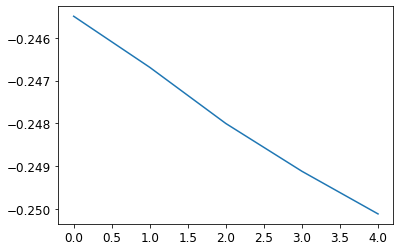

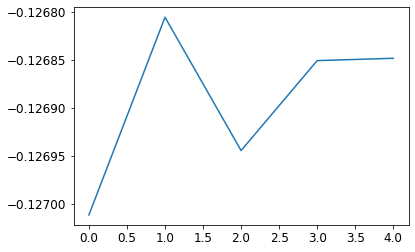

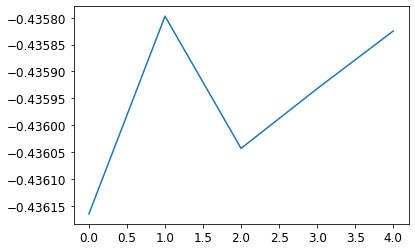

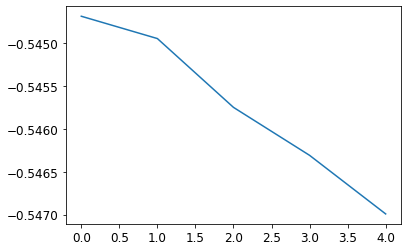

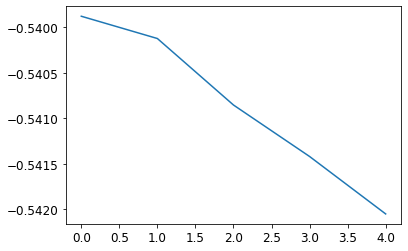

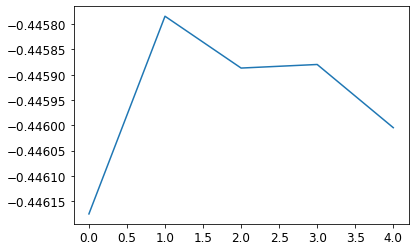

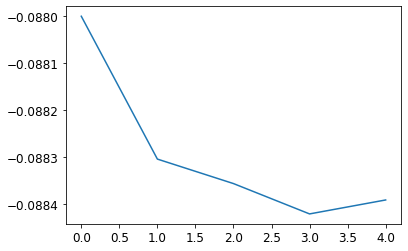

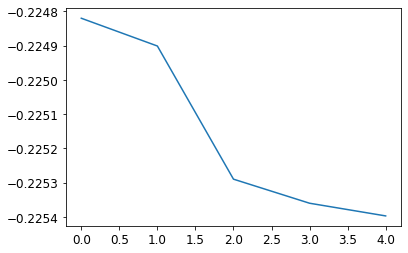

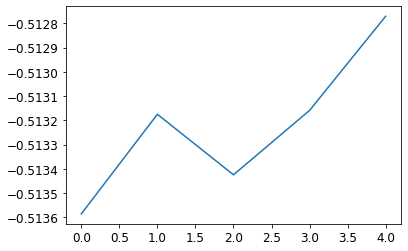

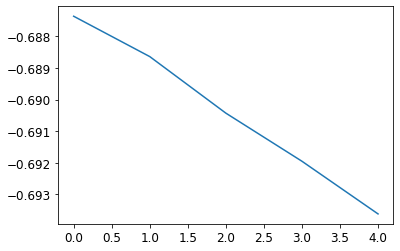

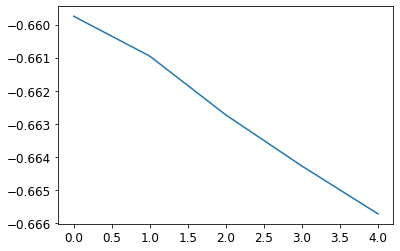

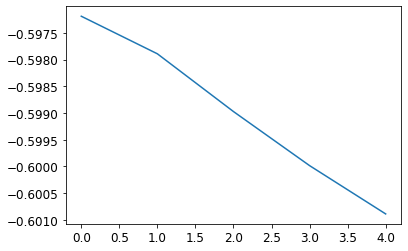

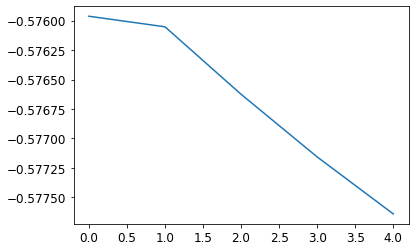

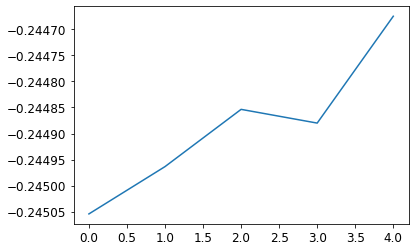

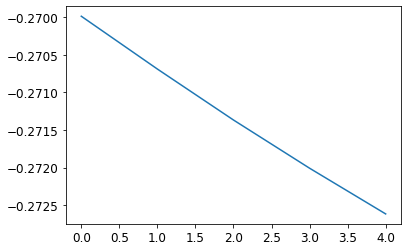

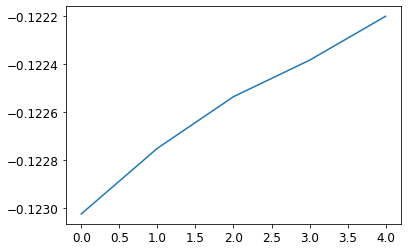

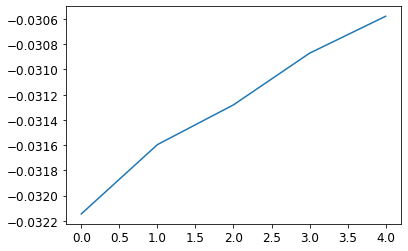

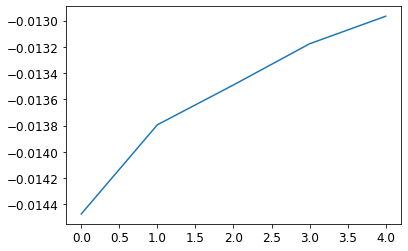

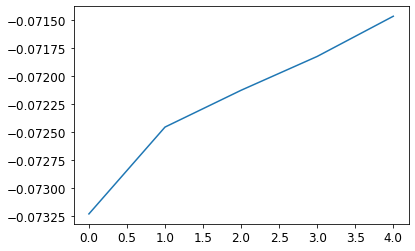

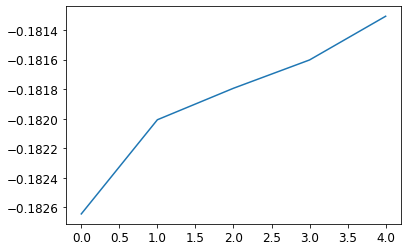

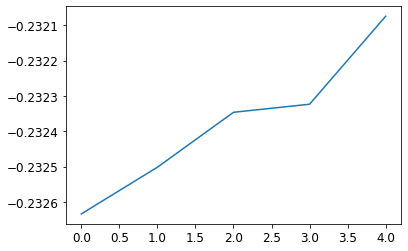

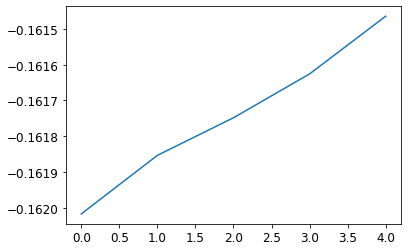

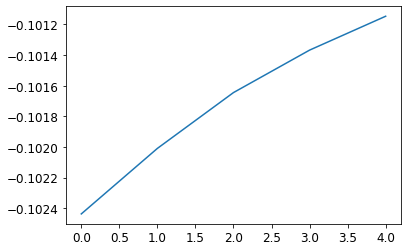

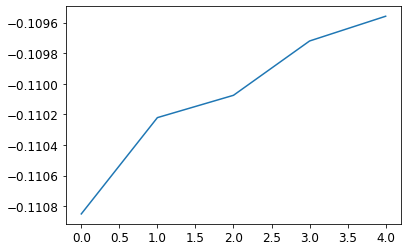

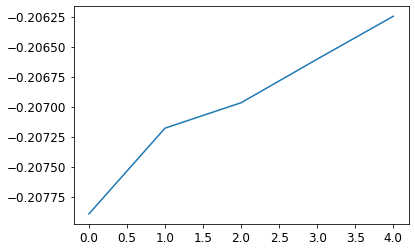

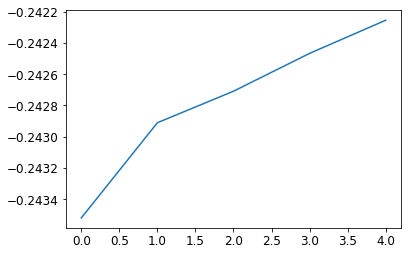

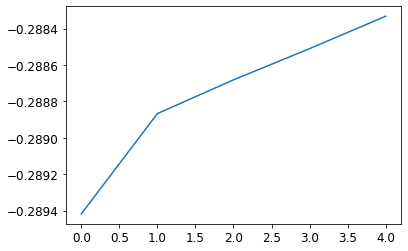

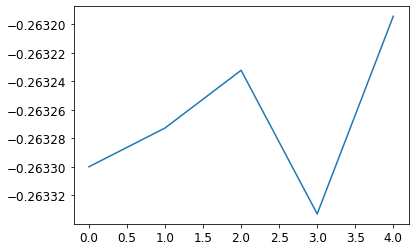

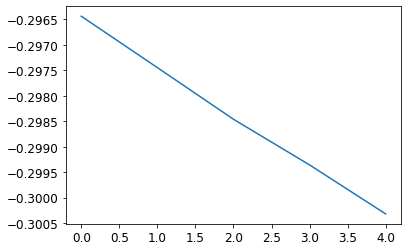

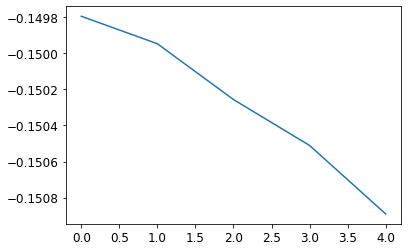

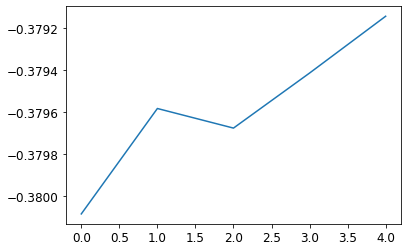

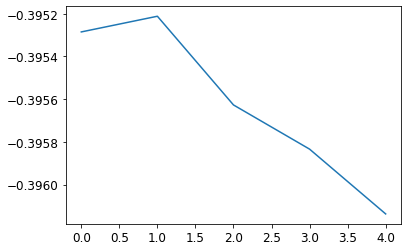

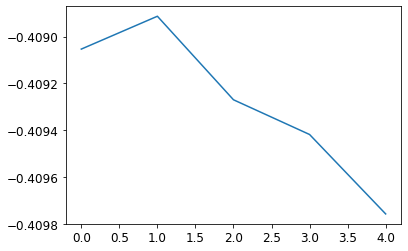

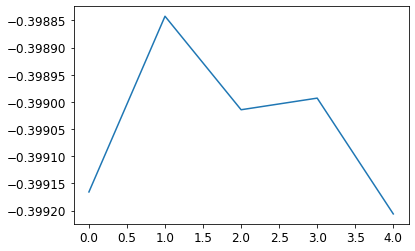

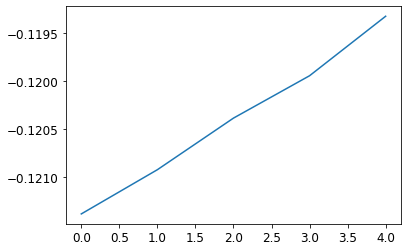

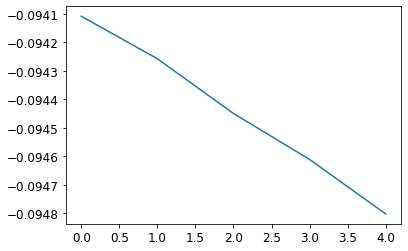

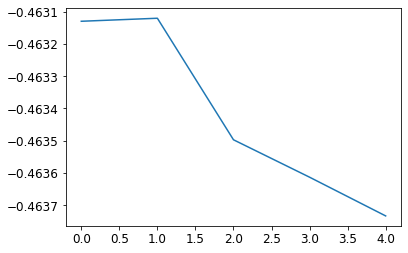

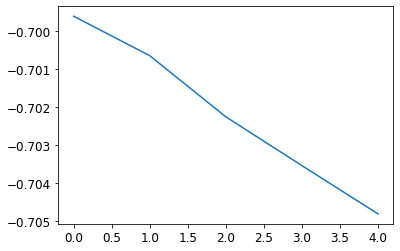

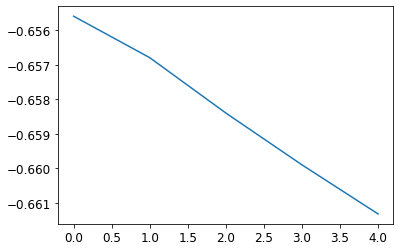

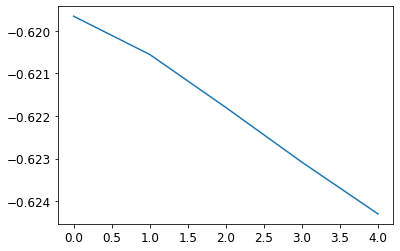

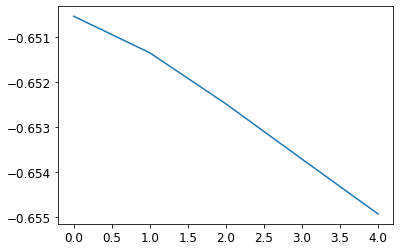

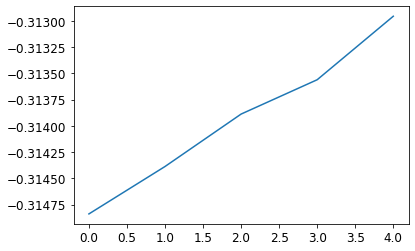

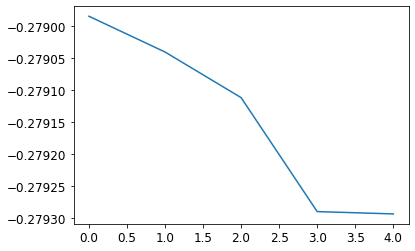

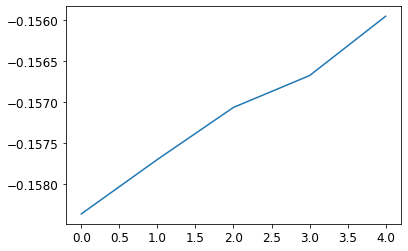

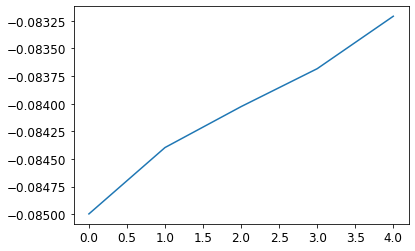

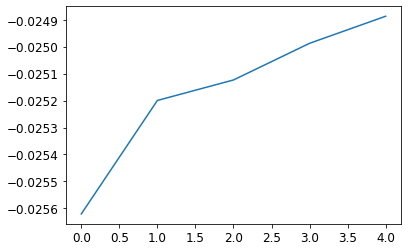

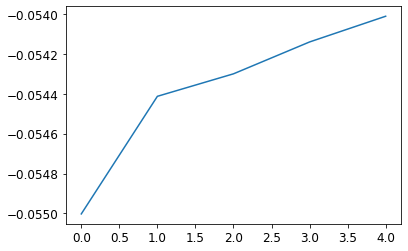

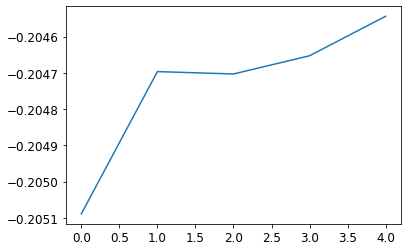

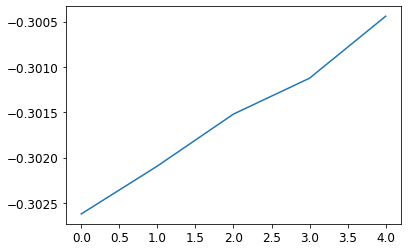

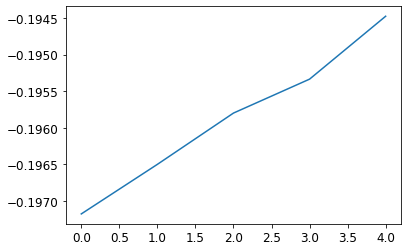

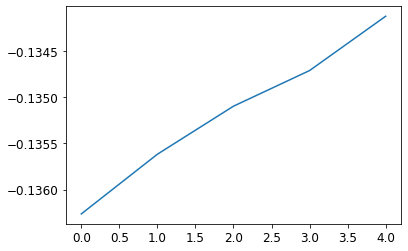

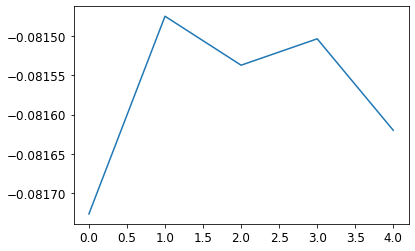

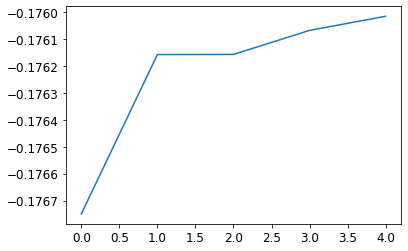

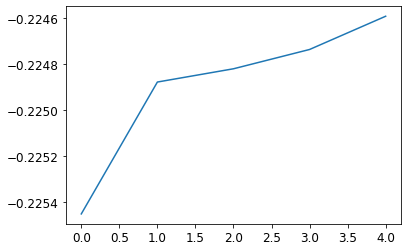

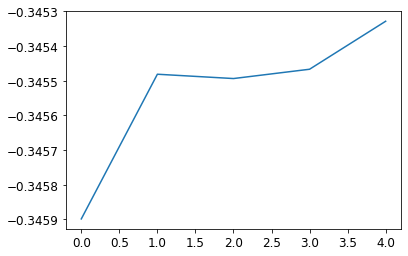

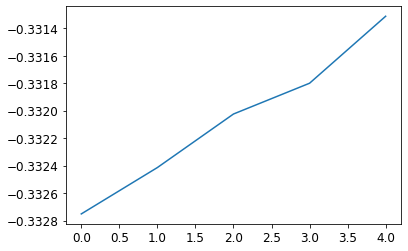

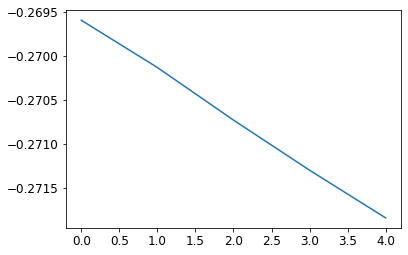

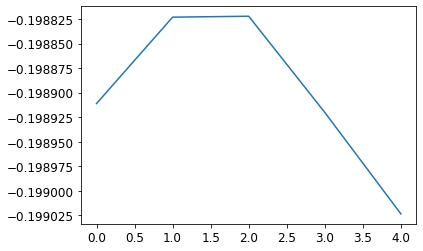

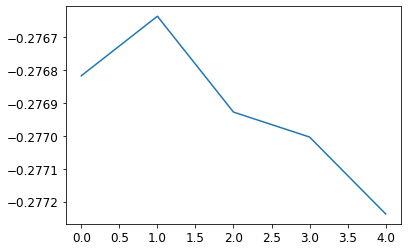

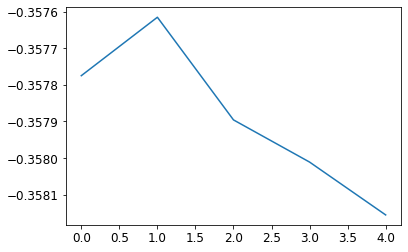

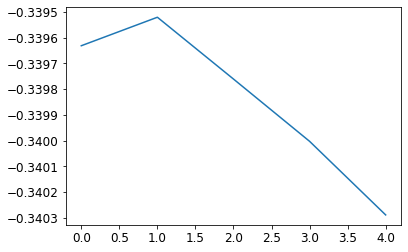

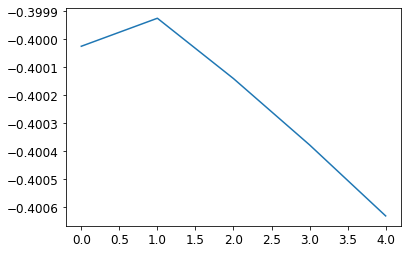

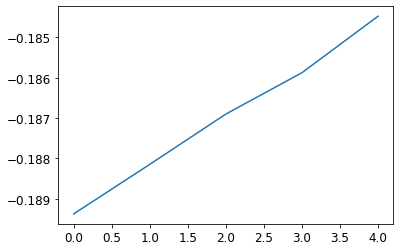

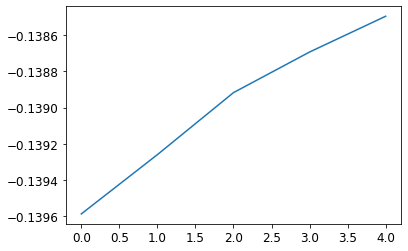

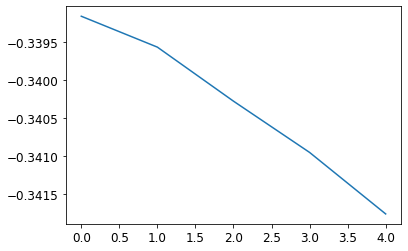

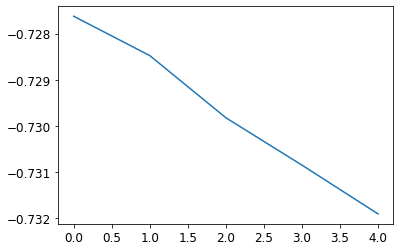

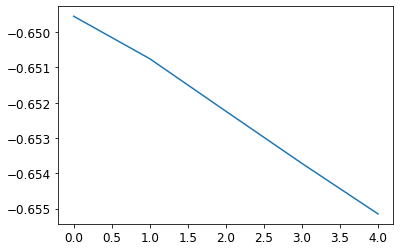

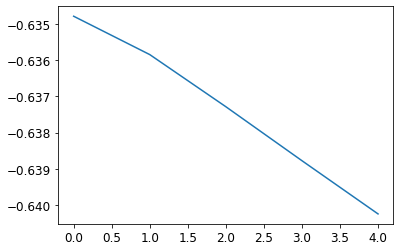

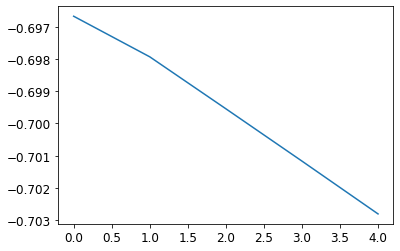

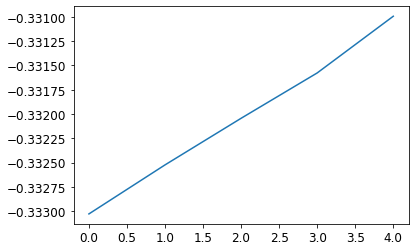

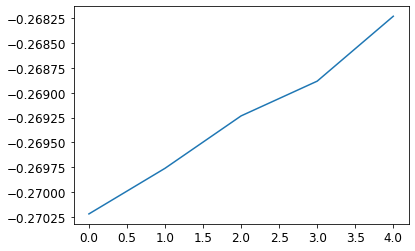

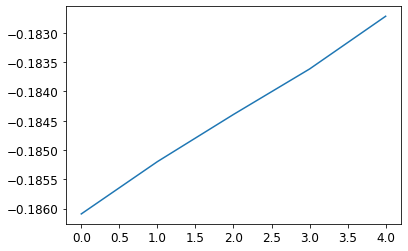

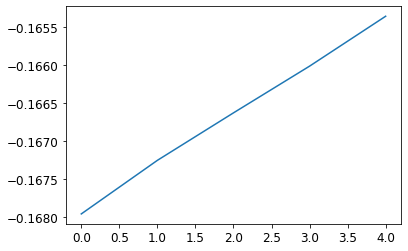

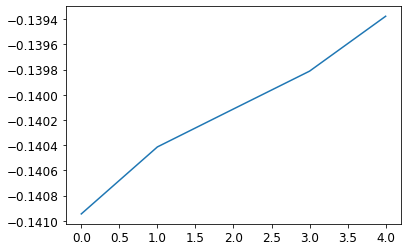

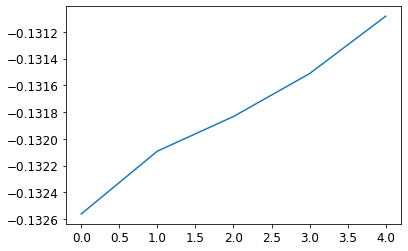

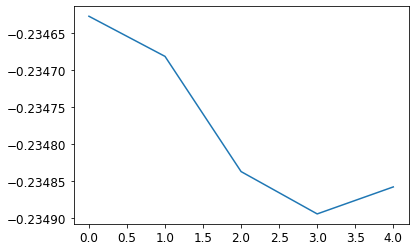

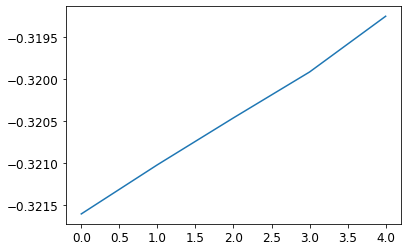

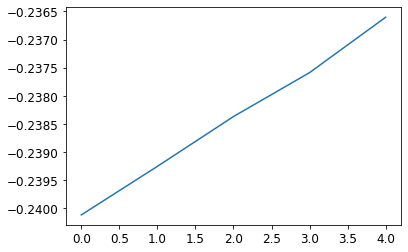

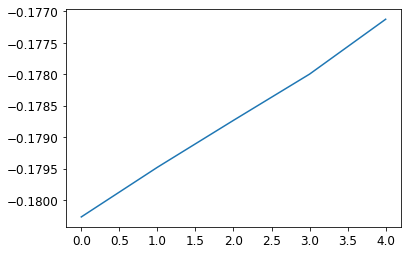

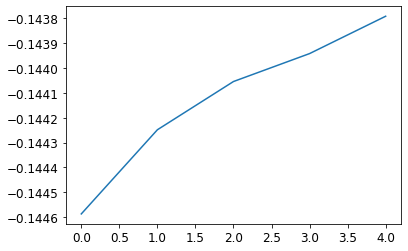

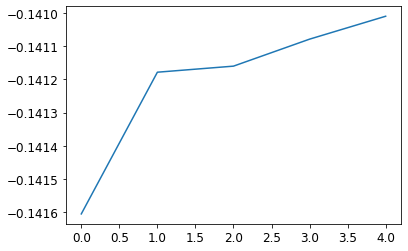

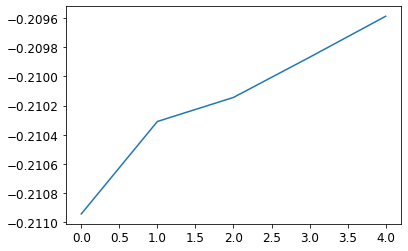

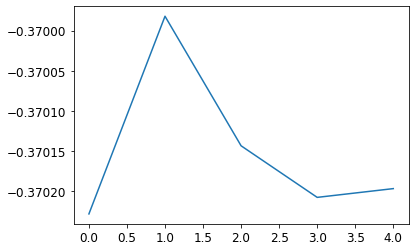

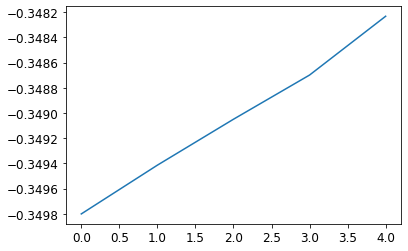

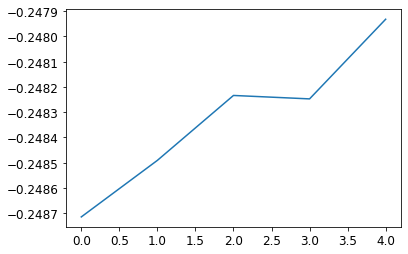

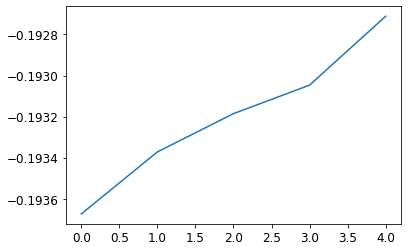

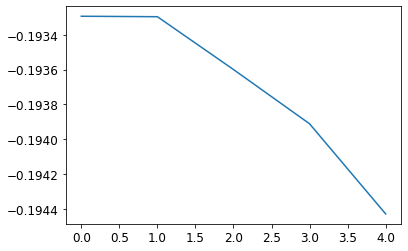

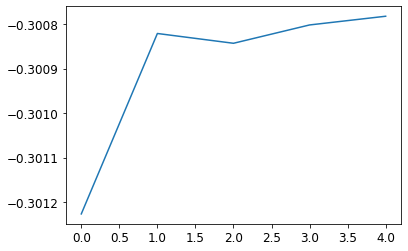

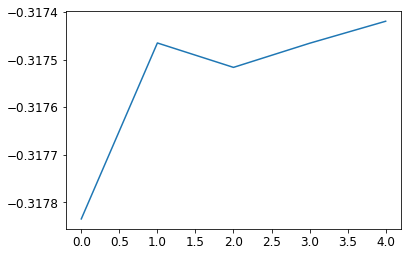

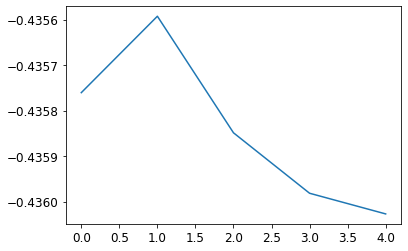

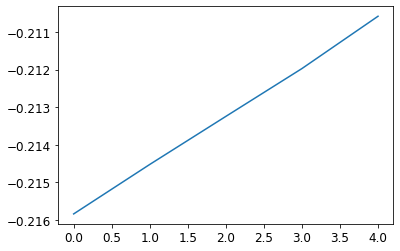

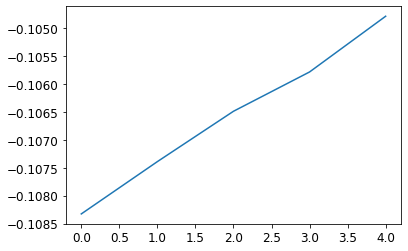

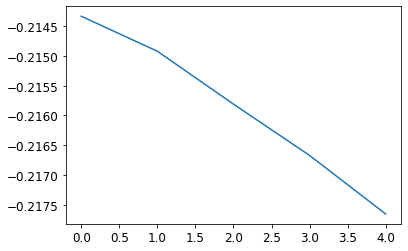

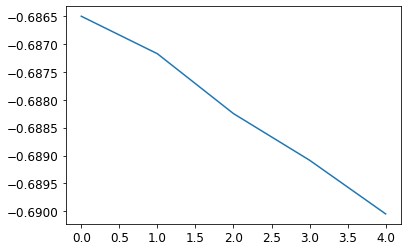

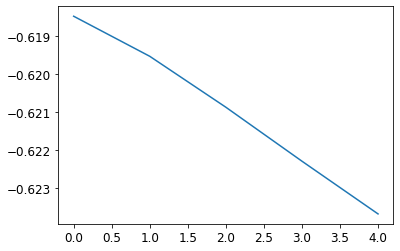

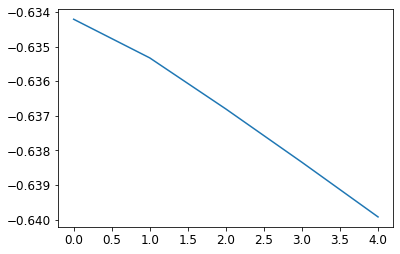

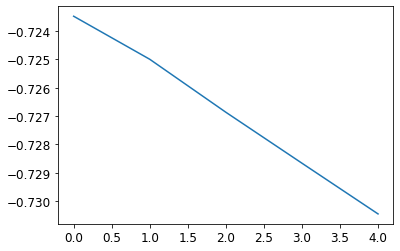

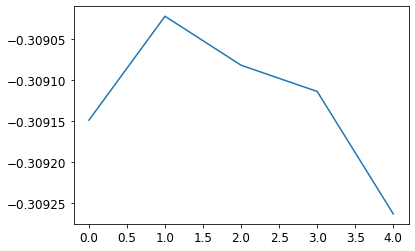

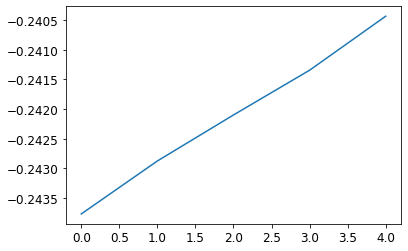

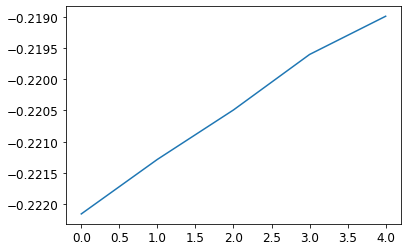

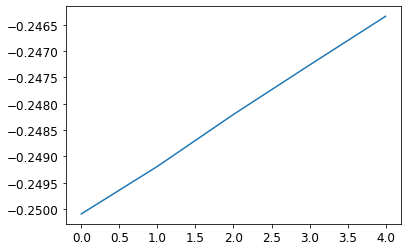

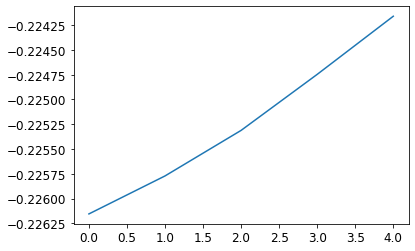

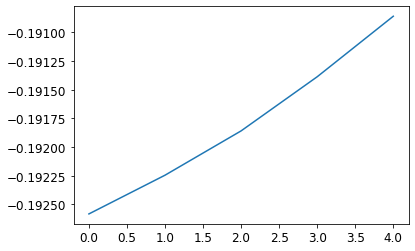

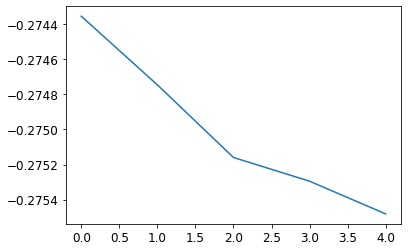

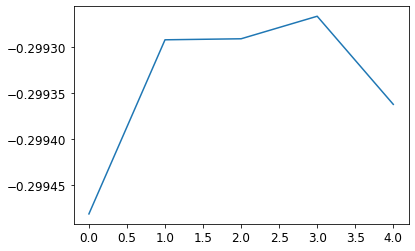

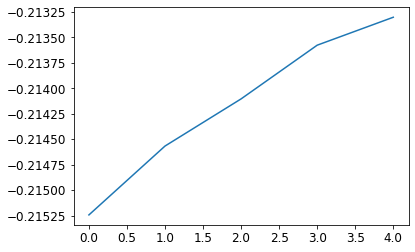

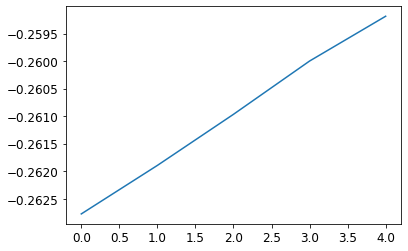

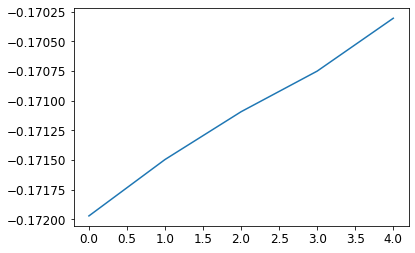

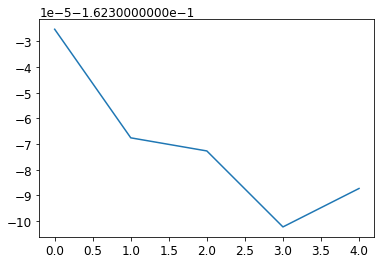

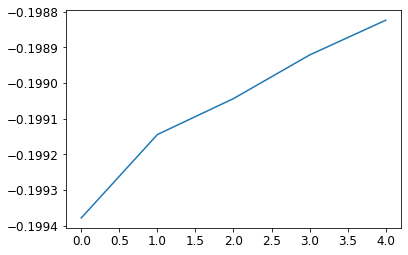

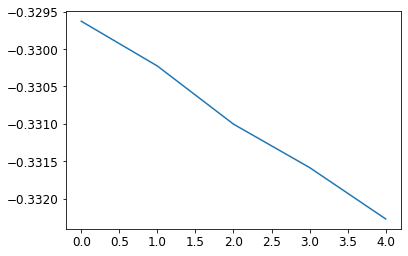

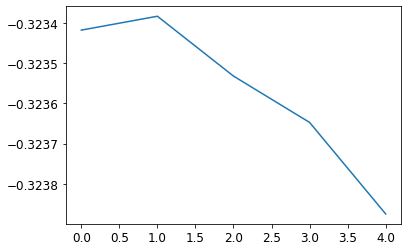

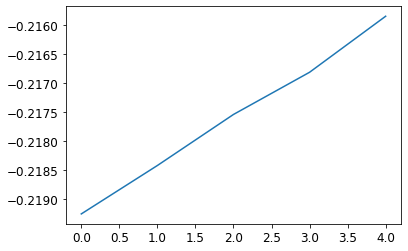

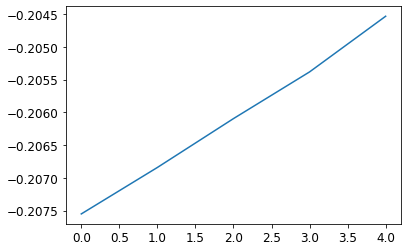

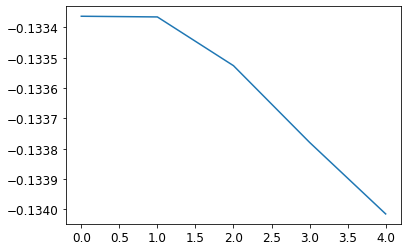

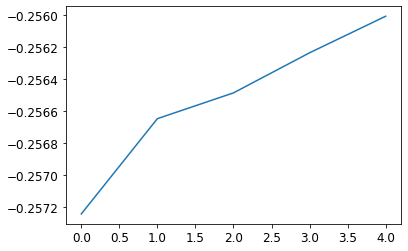

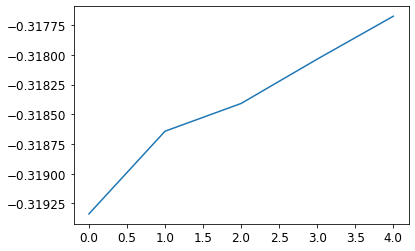

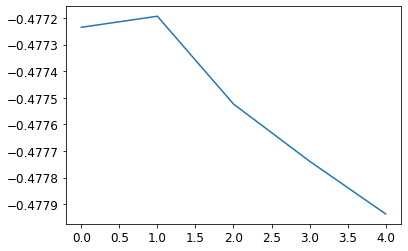

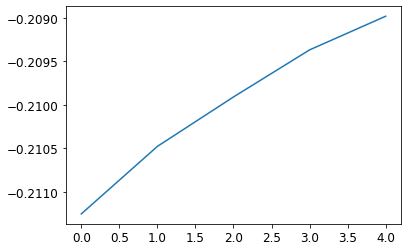

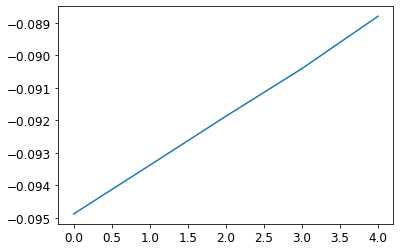

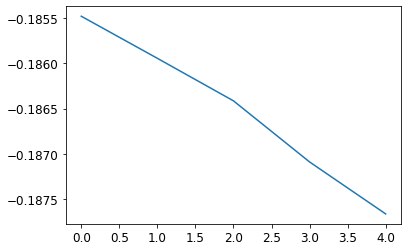

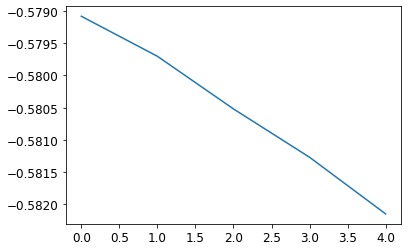

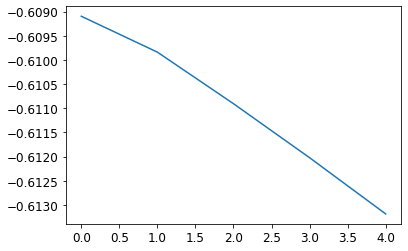

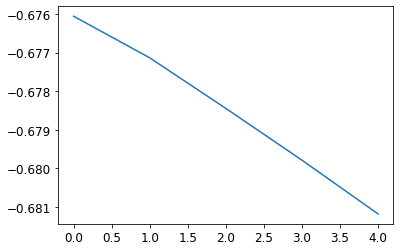

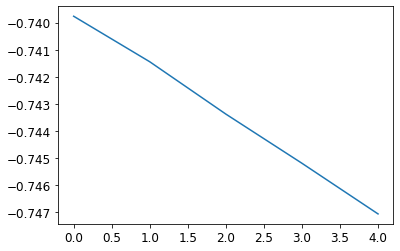

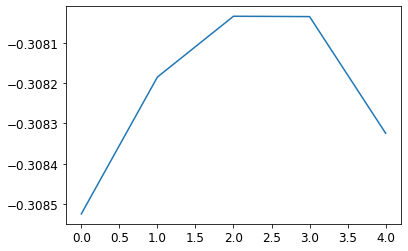

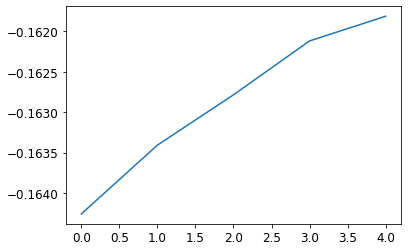

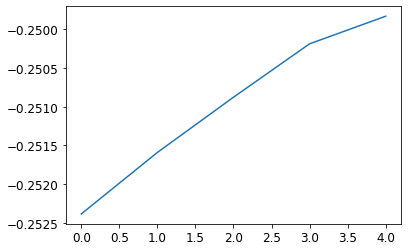

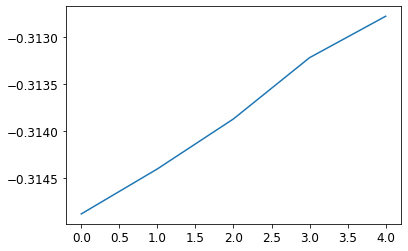

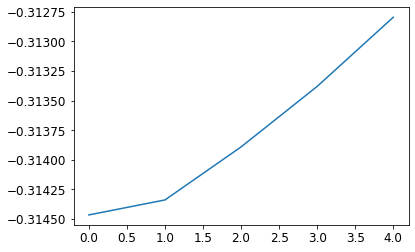

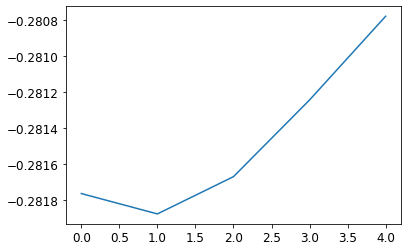

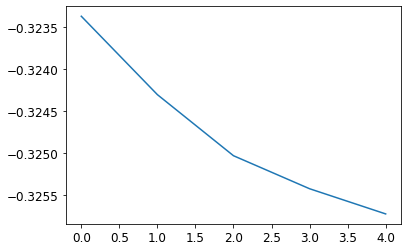

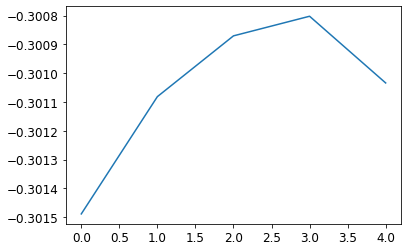

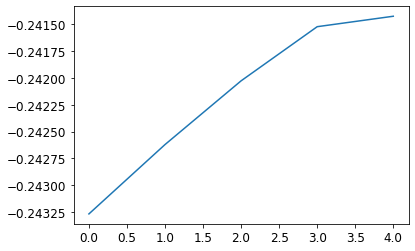

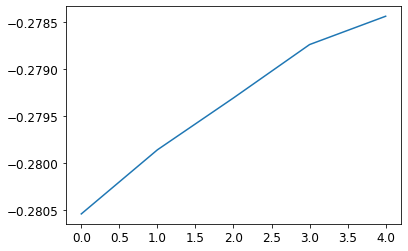

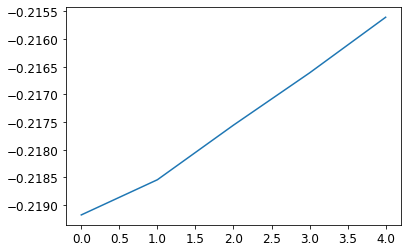

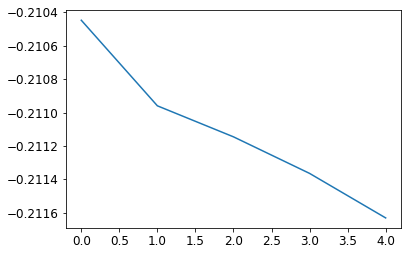

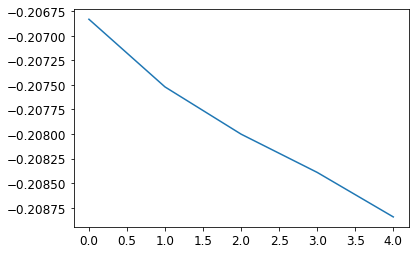

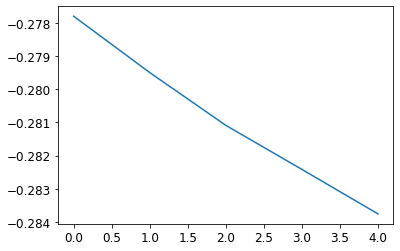

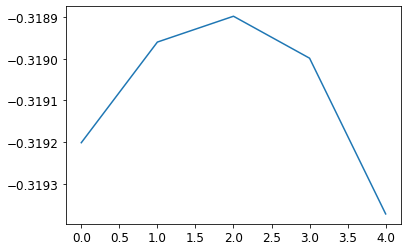

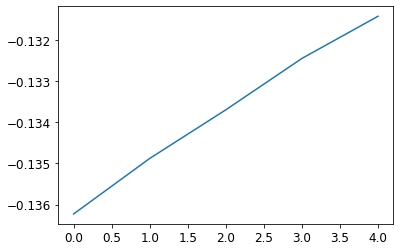

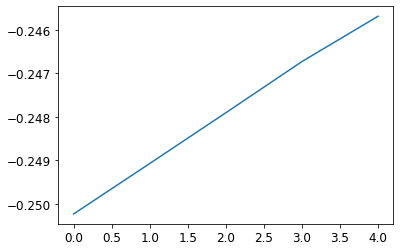

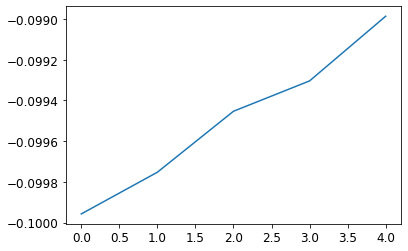

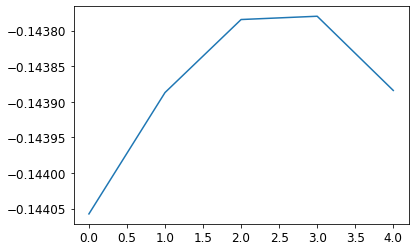

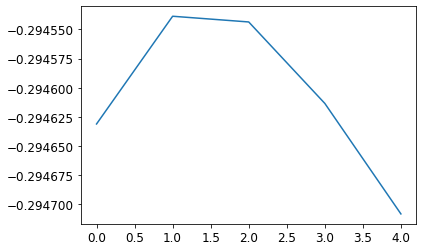

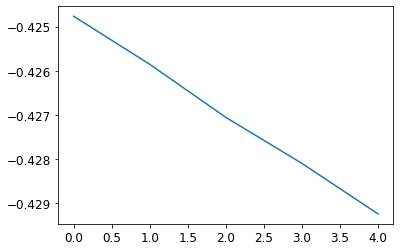

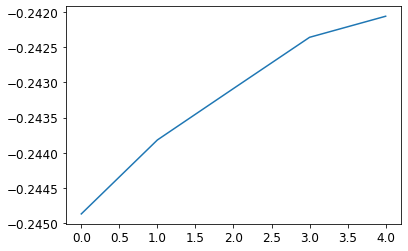

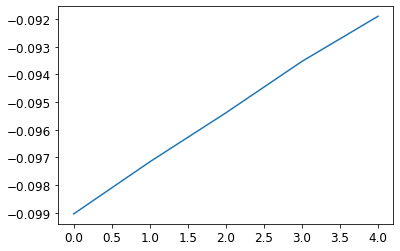

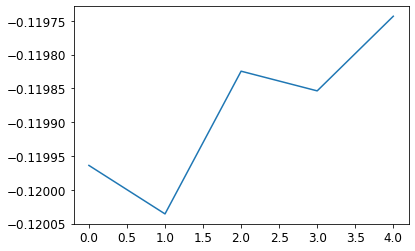

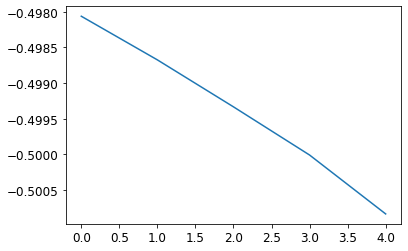

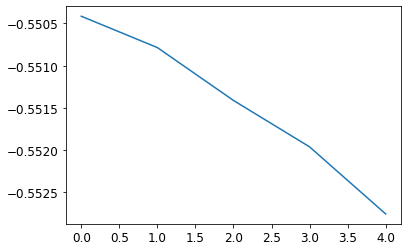

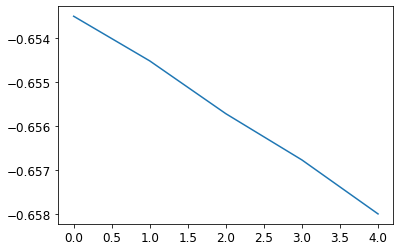

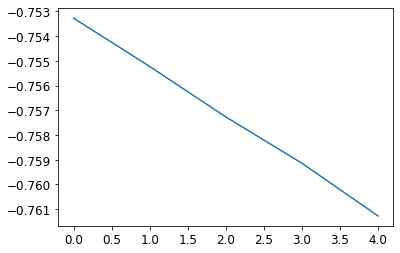

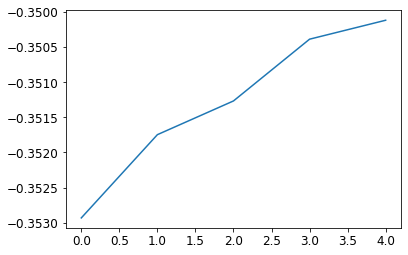

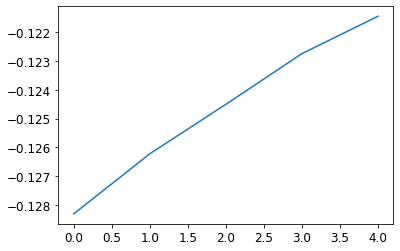

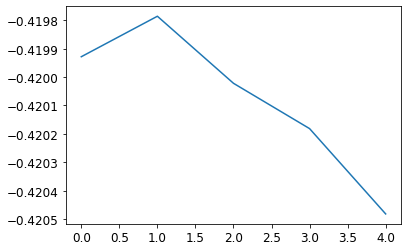

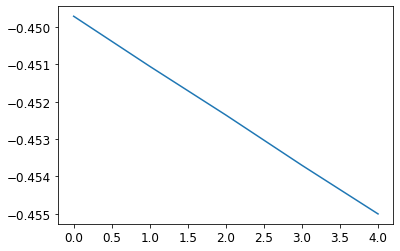

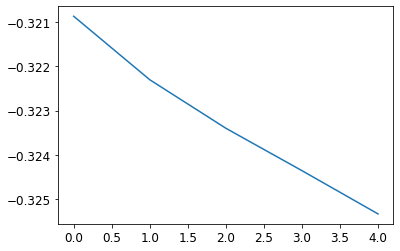

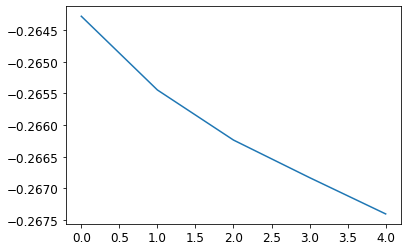

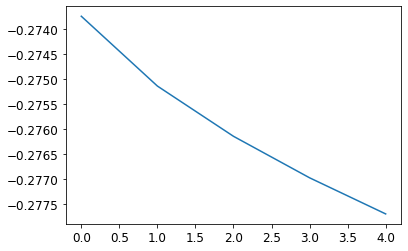

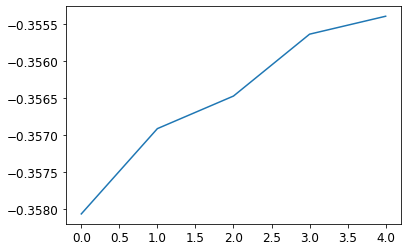

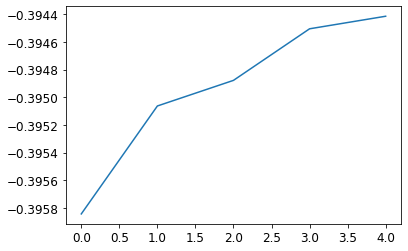

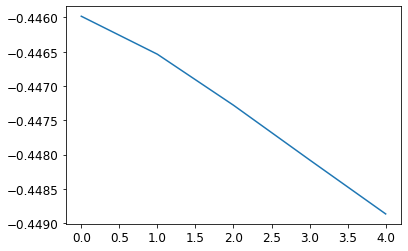

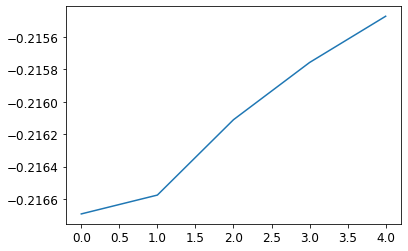

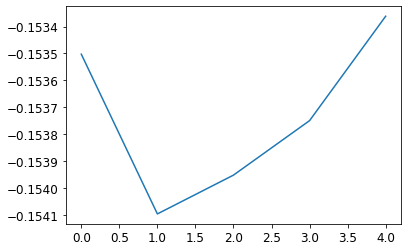

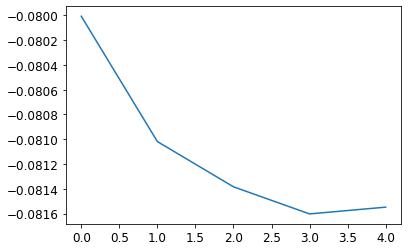

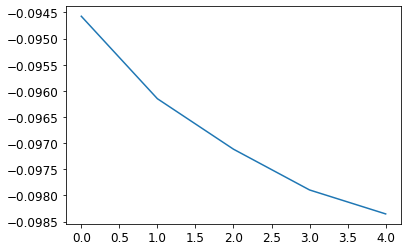

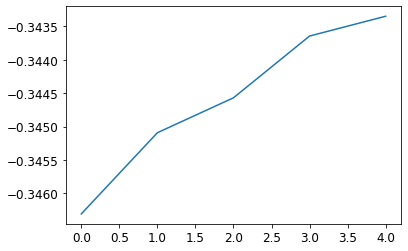

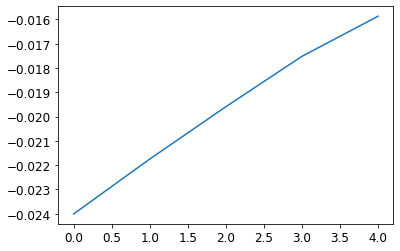

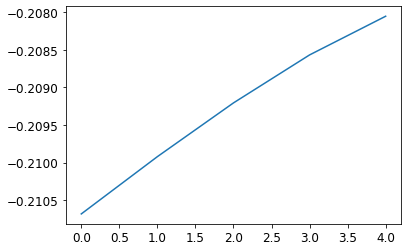

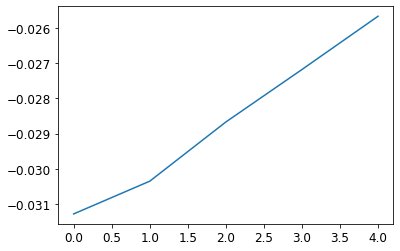

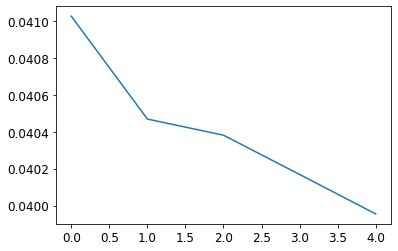

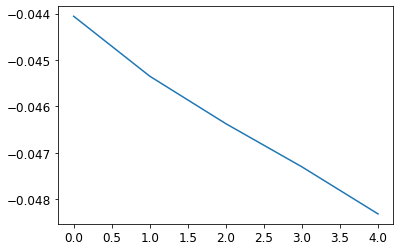

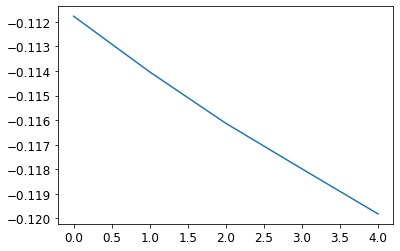

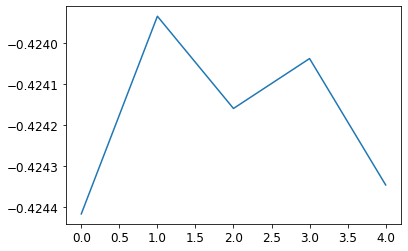

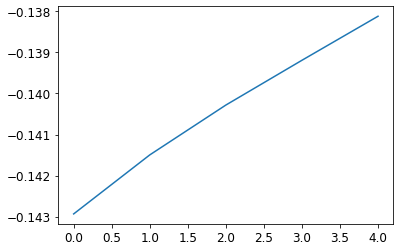

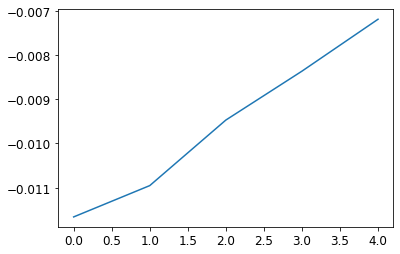

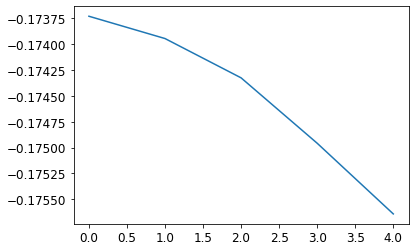

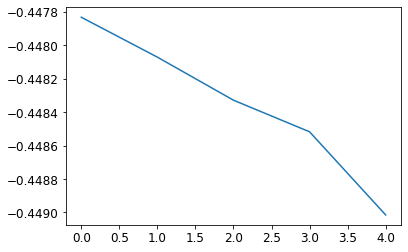

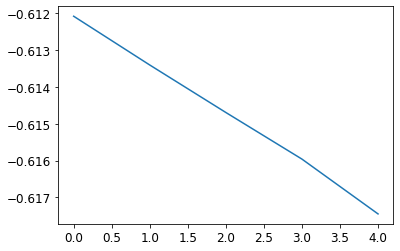

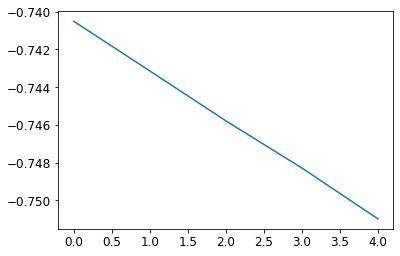

In [84]:
start_iter = -5 
nl = lambda_np.shape[-1]
nsubplots = np.ceil( int(nl/9))
# fig, axs = plt.subplots()
for i in range(nl):
    plt.plot(lambda_np[start_iter:,i])
    plt.show()
    # if i==9: 
        # plt.show()

### Plot individual errors

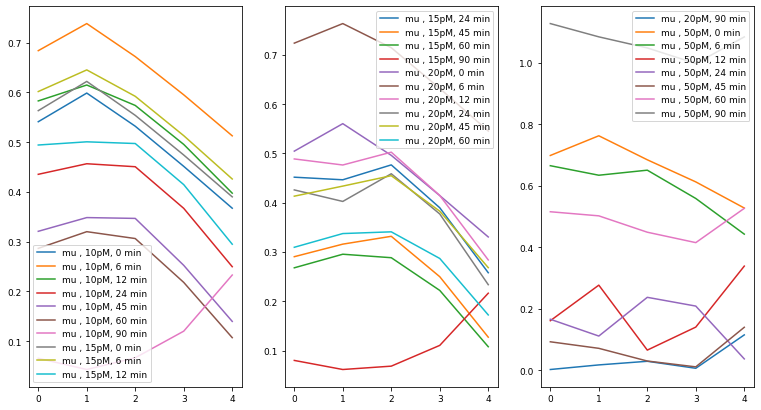

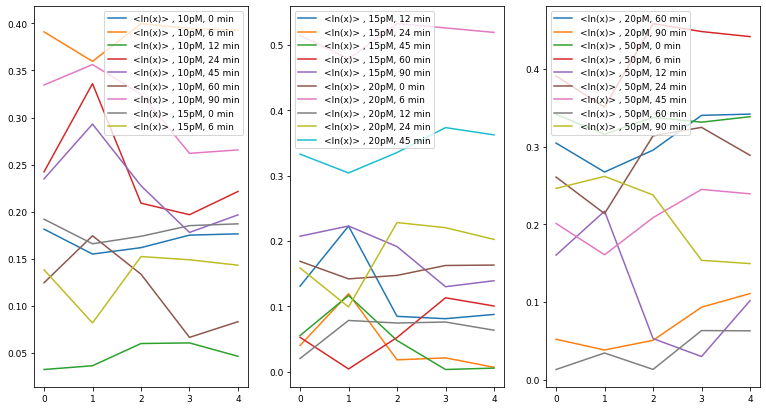

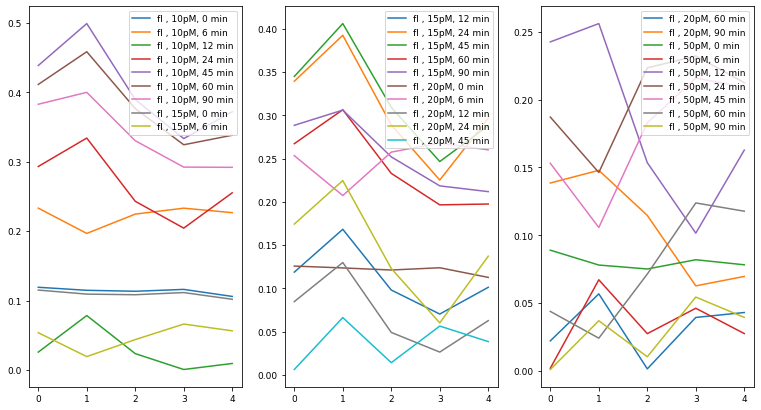

ValueError: x and y must have same first dimension, but have shapes (213,) and (5,)

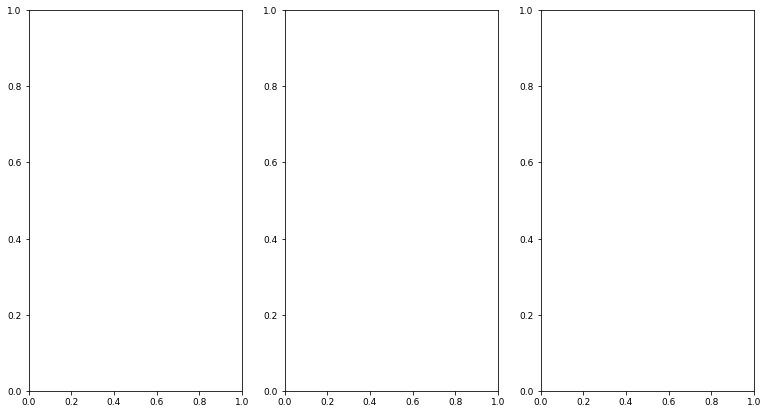

In [41]:
nc = 28 
plt.rcParams.update({'font.size': 9})


# plot the means 
start_iter = -5
i = 0 
nplots = int(np.ceil(nc/10))
fig, axs = plt.subplots(1,nplots, figsize = (13,7))
j=0
for i in range(nc): 
    y =  real_abs[start_iter:,int(i)]
    x = np.arange(len(y))
#     print(len(x))
    axs[j].plot(x,y,  label = f'{cons_title[i]}')

    axs[j].legend(loc='best')
    if (i+1)%10==0: 
#         plt.show()
        j+=1
plt.show()

fig, axs = plt.subplots(1,nplots, figsize = (13,7))


j=0
ii=0
for i in range(nc, 2*nc): 
    y =  real_abs[start_iter:,int(i)]
    x = np.arange(len(y))
#     print(len(x))
    axs[j].plot(x,y,  label = f'{cons_title[i]}')

    axs[j].legend(loc='best')
    ii+=1
    if (ii+1)%10==0: 
#         plt.show()
        j+=1
plt.show()

fig, axs = plt.subplots(1,nplots, figsize = (13,7))
j=0
ii=0
for i in range(2*nc, 3*nc): 
    y =  real_abs[start_iter:,int(i)]
    x = np.arange(len(y))
#     print(len(x))
    axs[j].plot(x,y,  label = f'{cons_title[i]}')

    axs[j].legend(loc='best')
    ii+=1
    if (ii+1)%10==0: 
#         plt.show()
        j+=1
plt.show()

fig, axs = plt.subplots(1,nplots, figsize = (13,7))
j=0
ii=0
for i in range(3*nc, 4*nc): 
    y =  real_abs[start_iter:,int(i)]
    x = np.arange(start_iter, len(real_abs[:,int(i)]))
#     print(len(x))
    axs[j].plot(x,y,  label = f'{cons_title[i]}')

    axs[j].legend(loc='best')
    ii+=1
    if (ii+1)%10==0: 
#         plt.show()
        j+=1
plt.show()
    

In [ ]:
ncons = len(real_cons)

mumu_data = np.mean(real_cons[:int(ncons/4)])
mulnx_data = np.mean(real_cons[int(ncons/4):int(ncons/2)])
mu_per = .25
# print(mumu_data)
# print(mus_data)
muc_len = 28
lnx_len = 28
pc_len = 28*2
norm_vec = np.concatenate( (mumu_data*(np.ones(muc_len)), mulnx_data*(np.ones(lnx_len))  ,  mu_per*(np.ones(pc_len)) ), axis = 0)

In [ ]:
np.tile(norm_vec, (2,1)).shape

norm_vec_mat = np.tile(norm_vec, (lambda_np.shape[0],1))
lambda_np = lambda_np/norm_vec_mat

In [ ]:
norm_vec

NameError: name 'cons_title' is not defined

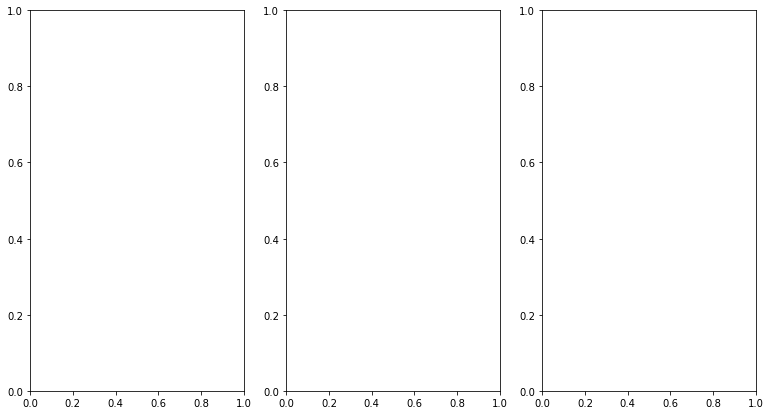

In [5]:
nc = 28 
# plot the means 
start_iter = 0
plt.rcParams.update({'font.size': 10})

mumu_data = np.mean(real_cons[:int(ncons/4)])
mulnx_data = np.mean(real_cons[int(ncons/4):int(ncons/2)])
mu_per = .25
# print(mumu_data)
# print(mus_data)
muc_len = 28
lnx_len = 28
pc_len = 28*2
norm_vec = np.concatenate( (mumu_data*(np.ones(muc_len)), mulnx_data*(np.ones(lnx_len))  ,  mu_per*(np.ones(pc_len)) ), axis = 0)
# lambda_np
i = 0 
nplots = int(np.ceil(nc/10))
fig, axs = plt.subplots(1,nplots, figsize = (13,7))
j=0
for i in range(nc): 
    y =  lambda_np[start_iter:,int(i)]/norm_vec[i]
    x = np.arange(start_iter, len(lambda_np[:,int(i)]))
#     print(len(x))
    axs[j].plot(x,y,  label = f'{cons_title[i]}')

    axs[j].legend(loc='best')
    if (i+1)%10==0: 
#         plt.show()
        j+=1
plt.show()

fig, axs = plt.subplots(1,nplots, figsize = (13,7))


j=0
ii=0
for i in range(nc, 2*nc): 
    y =  lambda_np[start_iter:,int(i)]/norm_vec[i]
    x = np.arange(start_iter, len(lambda_np[:,int(i)]))
#     print(len(x))
    axs[j].plot(x,y,  label = f'{cons_title[i]}')

    axs[j].legend(loc='best')
    ii+=1
    if (ii+1)%10==0: 
#         plt.show()
        j+=1
plt.show()

fig, axs = plt.subplots(1,nplots, figsize = (13,7))
j=0
ii=0
for i in range(2*nc, 3*nc): 
    y =  lambda_np[start_iter:,int(i)]/norm_vec[i]
    x = np.arange(start_iter, len(lambda_np[:,int(i)]))
#     print(len(x))
    axs[j].plot(x,y,  label = f'{cons_title[i]}')

    axs[j].legend(loc='best')
    ii+=1
    if (ii+1)%10==0: 
#         plt.show()
        j+=1
plt.show()

fig, axs = plt.subplots(1,nplots, figsize = (13,7))
j=0
ii=0
for i in range(3*nc, 4*nc): 
    y =  lambda_np[start_iter:,int(i)]/norm_vec[i]
    x = np.arange(start_iter, len(lambda_np[:,int(i)]))
#     print(len(x))
    axs[j].plot(x,y,  label = f'{cons_title[i]}')

    axs[j].legend(loc='best')
    ii+=1
    if (ii+1)%10==0: 
#         plt.show()
        j+=1
plt.show()
    

In [ ]:
preds

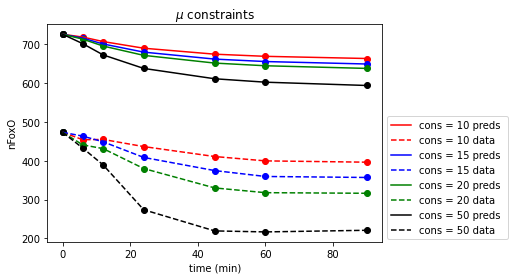

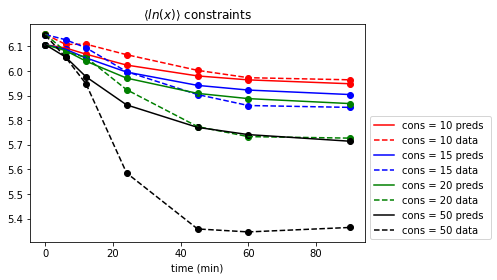

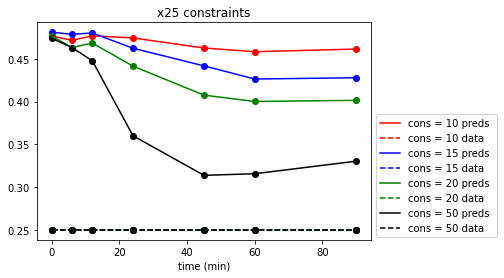

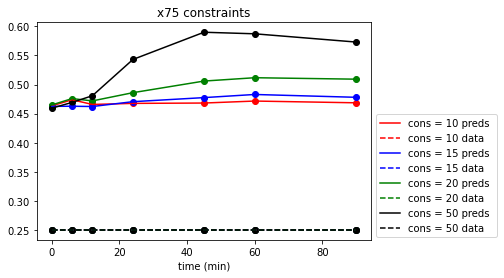

In [36]:
# ## plot predictions
# latest_iteration = err_np.shape[0]-1
# print(latest_iteration)
times_arr = np.array([ 0,  6, 12, 24, 45, 60, 90]) # min #make it in seconds 
L  = np.array([10,15,20,50]) # pM #make it in nM# load the latest moments 
mom_np = Csv_to_Np(Best_iteration, dat = 'cellpreds')
preds = calculate_constraints(mom_np)
ntimes = 7 
ncons = 4
j = 0
clist = ['r', 'b', 'g', 'k']
for i in range(ncons):
    plt.plot(times_arr, preds[j:j+ntimes], label = f'cons = {L[i]} preds ', c = clist[i])
    plt.scatter(times_arr, preds[j:j+ntimes], c = clist[i])#, label = f'cons = {L[i]} preds ')
    plt.plot(times_arr, real_cons[j:j+ntimes], '--', label = f'cons = {L[i]} data ',c = clist[i])
    plt.scatter(times_arr, real_cons[j:j+ntimes], c = clist[i])#, '-', label = f'cons = {L[i]} data ')
    j+=ntimes 
plt.legend(bbox_to_anchor = [1,.6])
plt.title(r'$\mu $ constraints')
plt.xlabel('time (min)')
plt.ylabel('nFoxO')
plt.show()

for i in range(ncons):
    plt.plot(times_arr, preds[j:j+ntimes], label = f'cons = {L[i]} preds ', c = clist[i])
    plt.scatter(times_arr, preds[j:j+ntimes], c = clist[i])#, label = f'cons = {L[i]} preds ')
    plt.plot(times_arr, real_cons[j:j+ntimes], '--', label = f'cons = {L[i]} data ',c = clist[i])
    plt.scatter(times_arr, real_cons[j:j+ntimes], c = clist[i])#, '-', label = f'cons = {L[i]} data ')
    j+=ntimes 
plt.legend(bbox_to_anchor = [1,.6])
plt.title(r'$\langle ln(x)  \rangle $ constraints')
plt.xlabel('time (min)')
# plt.ylabel('nFoxO')
plt.show()

for i in range(ncons):
    plt.plot(times_arr, preds[j:j+ntimes], label = f'cons = {L[i]} preds ', c = clist[i])
    plt.scatter(times_arr, preds[j:j+ntimes], c = clist[i])#, label = f'cons = {L[i]} preds ')
    plt.plot(times_arr, real_cons[j:j+ntimes], '--', label = f'cons = {L[i]} data ',c = clist[i])
    plt.scatter(times_arr, real_cons[j:j+ntimes], c = clist[i])#, '-', label = f'cons = {L[i]} data ')
    j+=ntimes 
plt.legend(bbox_to_anchor = [1,.6])
plt.title(r'x25 constraints')
plt.xlabel('time (min)')
# plt.ylabel('nFoxO')
plt.show()

for i in range(ncons):
    plt.plot(times_arr, preds[j:j+ntimes], label = f'cons = {L[i]} preds ', c = clist[i])
    plt.scatter(times_arr, preds[j:j+ntimes], c = clist[i])#, label = f'cons = {L[i]} preds ')
    plt.plot(times_arr, real_cons[j:j+ntimes], '--', label = f'cons = {L[i]} data ',c = clist[i])
    plt.scatter(times_arr, real_cons[j:j+ntimes], c = clist[i])#, '-', label = f'cons = {L[i]} data ')
    j+=ntimes 
plt.legend(bbox_to_anchor = [1,.6])
plt.title(r'x75 constraints')
plt.xlabel('time (min)')
# plt.ylabel('nFoxO')
plt.show()
    
    

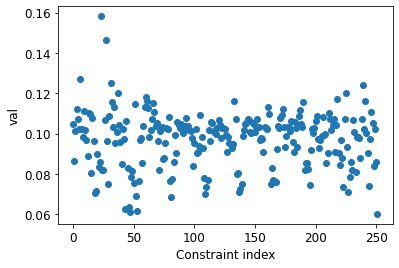

In [19]:
moments_np = Csv_to_Np(index = Best_iteration )
pred = calculate_constraints(moments_np)
# print(pred)
plt.scatter([range(len(pred))], pred)
plt.xlabel('Constraint index')
plt.ylabel('val')
plt.show()

In [86]:
# read the acceptance ratio 
accdf = pd.read_csv(acc_fn, header=None)
# accdf.iloc[0,:]
# print(accdf)
#col for rej flag par idx 4 
# col for delta e is 6 

ParserError: Error tokenizing data. C error: Expected 4 fields in line 2, saw 5


In [39]:
err_np.shape[0]

45

In [42]:
alist = [] 
accidx = 2
for i in range(err_np.shape[0]):
    idx = np.where(accdf.iloc[:,0] == i)[0]
#     print(idx)
    alist.append(np.mean(accdf.iloc[idx,accidx]))
print(alist)

rejlist = [] 
rejidx = 4
for i in range(err_np.shape[0]):
    idx = np.where(accdf.iloc[:,0] == i)[0]
    rejlist.append(np.mean(accdf.iloc[idx,rejidx]))
print(rejlist)

NameError: name 'accdf' is not defined

In [33]:
deltaEindx  = 6 
deltaElist = [] 
from collections import defaultdict
deltaEdict = defaultdict(lambda: 'not present')

rejidx = 4
for i in range(err_np.shape[0]):
    idx = np.where(accdf.iloc[:,0] == i)[0]
    deltaEdict[i] = accdf.iloc[idx,deltaEindx]
    # deltaElist.append(accdf.iloc[idx,deltaEindx])
print(deltaElist)

[]


In [44]:
deltaEdict

defaultdict(<function __main__.<lambda>()>,
            {0: 0      0.0
             1      0.0
             2      0.0
             3      0.0
             4      0.0
                   ... 
             155    NaN
             156    0.0
             157    NaN
             158    0.0
             159    NaN
             Name: 6, Length: 160, dtype: float64,
             1: 160    1.793938e-01
             161    8.188639e-04
             162   -1.272025e-02
             163    8.271440e-05
             164    3.913682e-07
                        ...     
             361             NaN
             362    2.971485e-02
             363             NaN
             364   -8.572278e-02
             365             NaN
             Name: 6, Length: 206, dtype: float64,
             2: 366    -0.006173
             367    12.055743
             368    11.200571
             369    12.055653
             370    11.200076
                      ...    
             615          NaN
        

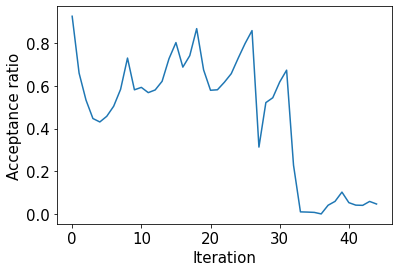

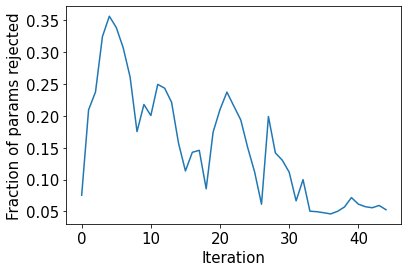

In [42]:
plt.rcParams.update({'font.size': 15})
plt.plot(alist)
# plt.ylim([0,.3])
plt.xlabel('Iteration')
plt.ylabel('Acceptance ratio')
plt.show()

plt.rcParams.update({'font.size': 15})
plt.plot(rejlist)
# plt.ylim([0,.3])
plt.xlabel('Iteration')
plt.ylabel('Fraction of params rejected')
plt.show()


In [116]:
deidx = 6


for i in range(err_np.shape[0]):
    idx = np.where(accdf.iloc[:,0] == i)[0]
    print('iteration', i, ' Acceptance ratio = ', alist[i])
    print(np.asarray(accdf.iloc[idx,deidx]))
    print()
# plot delta E, histogram for different iterations  ? 

iteration 0  Acceptance ratio =  0.9411111111111112
['[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]'
 '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]'
 '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]'
 '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]'
 '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]'
 '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]'
 '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]'
 '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]'
 '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]'
 '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]'
 '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]'
 '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]'
 '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]' '[0.]'
 '[0.]' '[0.]' '[0.]' '[0

In [67]:
idx = np.where(accdf.iloc[:,0] == 0)[0][-1]
accdf.iloc[idx,2]

0.9411111111111112

Plot a gamma distribution
- given a specific condition (index in moments and variance)
- Get alpha and beta  (now that you have means and variance)
- plot the gamma distribution along with x25 and x75 corresponding to that distribution

In [120]:
# read variance 
mom_np = Csv_to_Np(index= Best_iteration, dat = 'moments')
var_np = Csv_to_Np(index= Best_iteration, dat = 'variance')
print(mom_np.shape)
print(var_np.shape)

(12220, 112)
(12220, 28)


In [147]:
means_np = mom_np[:,:var_np.shape[1]]
print(means_np.shape)
alpha_np = (means_np**2)/(var_np)
beta_np = var_np/means_np
# condition indx = 0 
cond_idx = 0 # this is t=0 for conc = 10pM 
cell_idx = 0 # this is cell 0 
cell_alpha, cell_beta = alpha_np[cell_idx, cond_idx], beta_np[cell_idx, cond_idx]
## 

(12220, 28)


In [148]:
cell_alpha, cell_beta
means_np[cell_idx, cond_idx]
var_np[cell_idx, cond_idx]

9.175429463919532

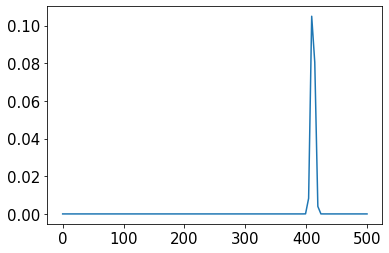

In [151]:
from scipy.stats import gamma 
x = np.linspace (0, 500, 100) 
y = gamma.pdf(x, a=cell_alpha, scale=cell_beta)
plt.plot(x, y)

In [156]:
mean, var = gamma.stats(a=cell_alpha, scale = cell_beta, moments = 'mv')

In [157]:
mean

array(411.15062977)

In [108]:
mom_np.shape

(12220, 112)

In [113]:
nchange = np.random.randint(1,14)

In [114]:
nchange

2

In [115]:
idx = random.sample(range(0,10),nchange)

In [116]:
idx

[5, 2]

In [107]:
preds

array([412.79629944, 412.59154112, 412.03264006, 410.25153728,
       406.30965563, 403.52955353, 398.9028049 , 412.79629944,
       412.48937564, 411.65229692, 408.99010369, 403.12673191,
       399.01712435, 392.23449851, 412.79629944, 412.38735216,
       411.27294016, 407.73589087, 399.9832024 , 394.58291843,
       385.74353868, 412.79629944, 411.77817705, 409.01724917,
       400.3589315 , 381.91467755, 369.52766997, 350.20603063,
         6.02288943,   6.02239303,   6.02103669,   6.01670136,
         6.00703724,   6.00016373,   5.98861601,   6.02288943,
         6.02214525,   6.0201126 ,   6.01361929,   5.99916409,
         5.98890465,   5.97173305,   6.02288943,   6.02189775,
         6.01919002,   6.01054515,   5.99132593,   5.97771394,
         5.95501669,   6.02288943,   6.02041862,   6.01368598,
         5.99226456,   5.94501886,   5.91197713,   5.85810957,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

(array([ 108.,  716., 1320., 1038., 1712., 3133., 2851., 1217.,  234.,
          17.]),
 array([394.33354476, 396.35676523, 398.37998569, 400.40320615,
        402.42642661, 404.44964707, 406.47286753, 408.49608799,
        410.51930845, 412.54252891, 414.56574937]),
 <BarContainer object of 10 artists>)

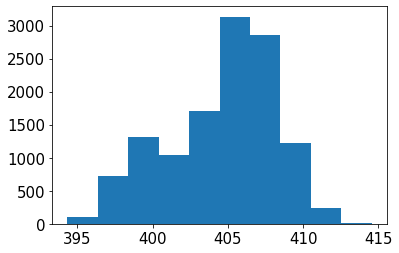

In [86]:
plt.hist(moments_np[:,0])

In [31]:
err_np.shape

(33, 112)

In [ ]:
l_np = Csv_to_Np(dat = 'lambdas')
print(l_np[4,:])

In [64]:
ncons = len(real_cons)
mumu_data = np.mean(real_cons[:int(ncons/4)])
mulnx_data = np.mean(real_cons[int(ncons/4):int(ncons/2)])
mu_per = .25
# print(mumu_data)
# print(mus_data)
muc_len = 28
lnx_len = 28
pc_len = 28*2
norm_vec = np.concatenate( (mumu_data*(np.ones(muc_len)), mulnx_data*(np.ones(lnx_len))  ,  mu_per*(np.ones(pc_len)) ), axis = 0)

In [34]:
# #### calculate constriants order of mag 
# predsmat = np.zeros((int(err_np.shape[0] - 20), err_np.shape[1]))
# for i in [Best_iteration]:
    
#     print(f'for index {i}')


mom_np = Csv_to_Np(Best_iteration, dat = 'cellpreds')
#     print(mom_np.shape)
#     print()
cons = calculate_constraints(mom_np)

vec = cons*lambda_np[Best_iteration,:]/(norm_vec)
#     predsmat[i,:] = cons
#  

In [70]:
lambda_np[Best_iteration,:]

array([ 1.12673538e-04,  1.69183724e-04,  1.80756978e-05, -7.55053928e-05,
       -8.96758337e-05, -7.45531164e-05, -1.10476625e-04,  1.12673538e-04,
        6.43389510e-05, -2.84819721e-05, -2.79711220e-05, -1.88140211e-05,
        1.81514348e-05, -2.70561654e-05,  1.12673538e-04,  1.94466316e-04,
        1.83928578e-05,  5.03147033e-05,  1.54407164e-04,  1.66680112e-04,
        1.13496973e-04,  1.12673538e-04,  8.17691457e-05, -3.49729221e-05,
        3.23175947e-04,  4.30154055e-04,  3.77345677e-04,  2.92900019e-04,
       -7.69972694e-05, -6.57239848e-05, -8.35598287e-05, -9.34664363e-05,
       -9.39491568e-05, -9.11372175e-05, -9.86854259e-05, -7.66251516e-05,
       -7.93981693e-05, -8.83656382e-05, -8.38351626e-05, -8.05531322e-05,
       -7.36888256e-05, -8.42834735e-05, -7.71592259e-05, -5.93951801e-05,
       -8.03716968e-05, -7.01506302e-05, -4.75441329e-05, -4.50170880e-05,
       -5.81213137e-05, -7.52002646e-05, -7.05928541e-05, -8.69318232e-05,
       -1.31187984e-05,  

In [ ]:
np.shape(err_np)[1]


Text(0.5, 1.0, 'mu and ln x ')

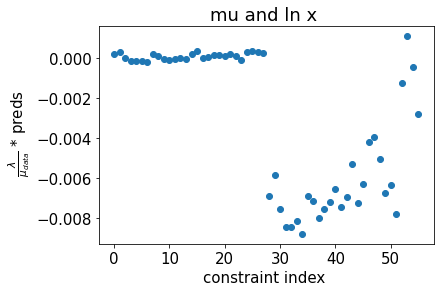

In [35]:
# st = 28
# end = 28*2
st = 0
end = 28*2

plt.scatter(np.arange(st, end),vec[st:end])
plt.xlabel('constraint index ')
plt.ylabel(r' $\frac{\lambda}{\mu_{data}}$ * preds')
plt.title('mu and ln x ')

Text(0.5, 1.0, 'All constraints')

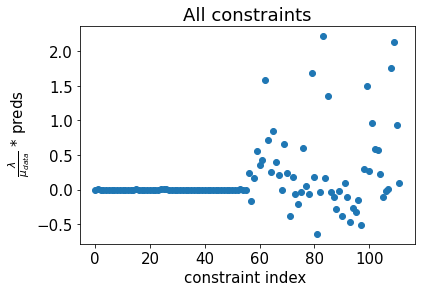

In [37]:
# st = 28
# end = 28*2
# st = 0
end = 112

plt.scatter(np.arange(st, end),vec[st:end])
plt.xlabel('constraint index ')
plt.ylabel(r' $\frac{\lambda}{\mu_{data}}$ * preds')
plt.title('All constraints')

In [72]:
len(list(range(-200,200,40)))

10

Text(0.5, 1.0, 'delta E between a few points from iteration 25')

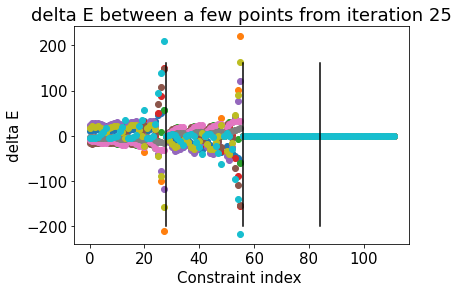

In [75]:
iteration = 25
nc = 28
lgm = lambda_np[iteration+1,:]
for i in range(30,40): 
    vec = moments_np[i+1,:] - moments_np[i,:]
    plt.scatter(range(len(lgm)), lgm*vec)
plt.plot( nc*np.ones(10), list(range(-200,200,40)), c = 'k')
plt.plot(2*nc* np.ones(10),list(range(-200,200,40)), c = 'k')
plt.plot(3*nc* np.ones(10), list(range(-200,200,40)), c = 'k')



plt.ylabel('delta E')
plt.xlabel('Constraint index ')
plt.title(f'delta E between a few points from iteration {iteration}')
#     plt.show()
    

constraints for iteration 0 
 [6.97390774e+02 6.93579632e+02 6.87908233e+02 6.79340475e+02
 6.71039480e+02 6.67774370e+02 6.64213603e+02 6.97390774e+02
 6.91775064e+02 6.83618360e+02 6.71651802e+02 6.60471872e+02
 6.56200021e+02 6.51636691e+02 6.97390774e+02 6.90029252e+02
 6.79567390e+02 6.64601943e+02 6.51033696e+02 6.45965566e+02
 6.40634044e+02 6.97390774e+02 6.80548928e+02 6.58900606e+02
 6.31044643e+02 6.08514805e+02 6.00727039e+02 5.92947297e+02
 6.15789293e+00 6.15371775e+00 6.14726047e+00 6.13719651e+00
 6.12707370e+00 6.12291561e+00 6.11821005e+00 6.15789293e+00
 6.15167713e+00 6.14215916e+00 6.12755196e+00 6.11305928e+00
 6.10720558e+00 6.10067827e+00 6.15789293e+00 6.14966526e+00
 6.13717809e+00 6.11822889e+00 6.09968427e+00 6.09230659e+00
 6.08417685e+00 6.15789293e+00 6.13811438e+00 6.10924431e+00
 6.06738917e+00 6.02921117e+00 6.01494074e+00 5.99988484e+00
 5.60625558e-09 1.73250985e-04 2.59876158e-04 3.46500544e-04
 4.33125443e-04 4.33125437e-04 5.19750537e-04 1.3805080

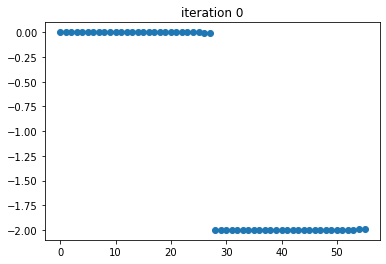

constraints for iteration 1 
 [   5.71664584    4.73332254    4.58865708    4.4941611     4.44078069
    4.42522806    4.41142084    5.71664584    4.67737974    4.53888144
    4.44375583    4.38752452    4.37110062    4.35640945    5.71664584
    4.63869255    4.50306242    4.40574681    4.34693246    4.32975276
    4.31426614    5.71664584    4.518901      4.37997226    4.2664509
    4.19695096    4.17659787    4.15822112    1.65376308  -95.95313832
 -176.51790397 -267.48192466 -328.03928174 -343.51007444 -354.48940535
    1.65376308 -137.44634131 -241.72083937 -345.26497627 -402.35287346
 -414.71639039 -422.72492623    1.65376308 -174.80598902 -295.75504843
 -402.63490669 -453.20782049 -463.04229337 -469.1842342     1.65376308
 -337.47173533 -484.42972135 -563.74272601 -588.25619168 -592.66412997
 -595.60530847    1.            1.            1.            1.
    1.            1.            1.            1.            1.
    1.            1.            1.            1.            1.
 

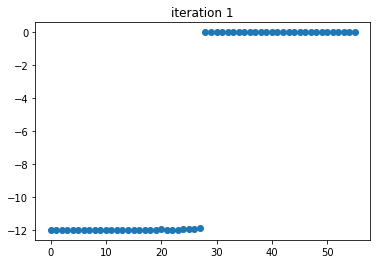

constraints for iteration 2 
 [3.10562407e+03 3.10562010e+03 3.10561576e+03 3.10561072e+03
 3.10560677e+03 3.10560532e+03 3.10560368e+03 3.10562407e+03
 3.10561812e+03 3.10561161e+03 3.10560404e+03 3.10559813e+03
 3.10559595e+03 3.10559348e+03 3.10562407e+03 3.10561613e+03
 3.10560746e+03 3.10559737e+03 3.10558948e+03 3.10558658e+03
 3.10558329e+03 3.10562407e+03 3.10560425e+03 3.10558257e+03
 3.10555736e+03 3.10553764e+03 3.10553038e+03 3.10552217e+03
 8.04096702e+00 8.04096575e+00 8.04096435e+00 8.04096273e+00
 8.04096145e+00 8.04096099e+00 8.04096046e+00 8.04096702e+00
 8.04096511e+00 8.04096301e+00 8.04096058e+00 8.04095867e+00
 8.04095797e+00 8.04095717e+00 8.04096702e+00 8.04096447e+00
 8.04096168e+00 8.04095843e+00 8.04095589e+00 8.04095495e+00
 8.04095389e+00 8.04096702e+00 8.04096064e+00 8.04095366e+00
 8.04094554e+00 8.04093919e+00 8.04093685e+00 8.04093421e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.0000000

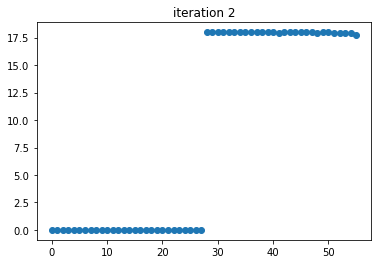

constraints for iteration 3 
 [807.83510198 807.83134781 807.82742555 807.82319788 807.82011692
 807.81903952 807.81789308 807.83510198 807.82947149 807.82358884
 807.8172481  807.81262726 807.81101142 807.80929207 807.83510198
 807.82759563 807.8197531  807.81129995 807.80513943 807.80298528
 807.80069303 807.83510198 807.8163504  807.7967588  807.77564186
 807.76025237 807.75487157 807.74914576   6.69432293   6.69431828
   6.69431342   6.69430819   6.69430437   6.69430303   6.69430161
   6.69432293   6.69431596   6.69430867   6.69430082   6.69429509
   6.69429309   6.69429096   6.69432293   6.69431363   6.69430392
   6.69429345   6.69428582   6.69428315   6.69428031   6.69432293
   6.6942997    6.69427544   6.69424928   6.69423021   6.69422355
   6.69421645   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.       

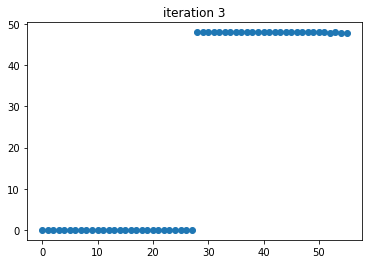

constraints for iteration 4 
 [694.10328371 694.10045898 694.09744167 694.09401759 694.09131114
 694.09029732 694.08916984 694.10328371 694.09904709 694.0945215
 694.08938596 694.08532661 694.08380598 694.08211503 694.10328371
 694.0976355  694.09160192 694.08475517 694.07934345 694.07731615
 694.07506172 694.10328371 694.0891714  694.07409612 694.05698922
 694.04346912 694.03840434 694.03277265   6.54258338   6.5425793
   6.54257495   6.54257002   6.54256611   6.54256465   6.54256303
   6.54258338   6.54257727   6.54257074   6.54256334   6.54255748
   6.54255529   6.54255285   6.54258338   6.54257523   6.54256653
   6.54255666   6.54254886   6.54254593   6.54254268   6.54258338
   6.54256303   6.54254129   6.54251663   6.54249713   6.54248982
   6.5424817    0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.         

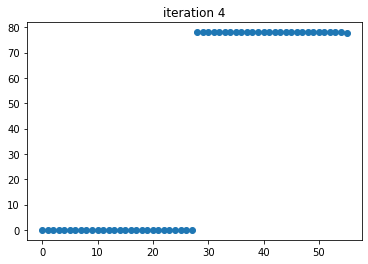

constraints for iteration 5 
 [629.07223327 629.06964942 629.06676868 629.06340612 629.06077814
 629.05982213 629.05877689 629.07223327 629.06835802 629.06403741
 629.05899405 629.05505276 629.05361893 629.05205126 629.07223327
 629.0670669  629.06130674 629.05458312 629.04932895 629.04741719
 629.04532762 629.07223327 629.05932646 629.04493626 629.02813988
 629.0150149  629.01023966 629.00502029   6.44420814   6.44420403
   6.44419945   6.4441941    6.44418992   6.4441884    6.44418673
   6.44420814   6.44420198   6.4441951    6.44418708   6.44418081
   6.44417853   6.44417603   6.44420814   6.44419992   6.44419076
   6.44418006   6.4441717    6.44416866   6.44416534   6.44420814
   6.44418761   6.44416471   6.44413799   6.44411711   6.44410951
   6.4441012    0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.       

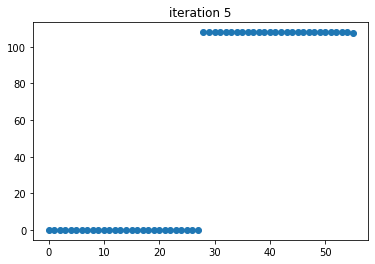

constraints for iteration 6 
 [585.55575901 585.55328284 585.550575   585.54743443 585.54489746
 585.5439359  585.54285081 585.55575901 585.55204533 585.54798409
 585.5432738  585.53946888 585.53802673 585.53639948 585.55575901
 585.55080815 585.54539388 585.53911427 585.53404199 585.53211934
 585.52994962 585.55575901 585.54339214 585.52986757 585.5141811
 585.50150993 585.49670684 585.49128645   6.37252261   6.37251838
   6.37251375   6.37250839   6.37250405   6.37250241   6.37250055
   6.37252261   6.37251627   6.37250933   6.37250128   6.37249477
   6.37249231   6.37248953   6.37252261   6.37251415   6.3725049
   6.37249417   6.3724855    6.37248221   6.3724785    6.37252261
   6.37250148   6.37247836   6.37245155   6.37242988   6.37242167
   6.37241241   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.         

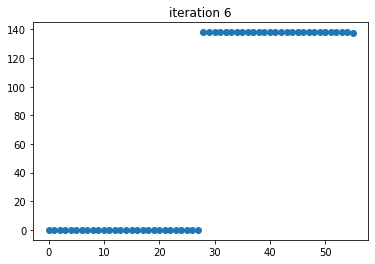

constraints for iteration 7 
 [553.96979904 553.9675281  553.96490437 553.9616245  553.95874568
 553.95758702 553.95621948 553.96979904 553.96639315 553.96245801
 553.95753886 553.9532213  553.95148358 553.94943234 553.96979904
 553.96525853 553.96001233 553.95345433 553.94769837 553.94538158
 553.94264682 553.96979904 553.95845731 553.94535188 553.92896939
 553.9145906  553.90880282 553.90197194   6.31706991   6.31706581
   6.31706107   6.31705515   6.31704994   6.31704785   6.31704538
   6.31706991   6.31706376   6.31705665   6.31704776   6.31703996
   6.31703682   6.31703312   6.31706991   6.31706171   6.31705223
   6.31704039   6.31702999   6.3170258    6.31702086   6.31706991
   6.31704942   6.31702575   6.31699615   6.31697016   6.3169597
   6.31694735   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.        

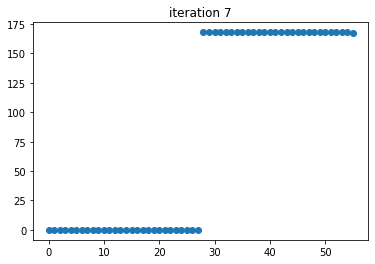

constraints for iteration 8 
 [529.90029166 529.89795017 529.89529328 529.892081   529.88951655
 529.88861425 529.88768591 529.90029166 529.89677993 529.89279507
 529.8879772  529.88413116 529.8827778  529.88138547 529.90029166
 529.89560996 529.8902975  529.88387438 529.87874701 529.87694289
 529.8750866  529.90029166 529.88859617 529.87532482 529.85927873
 529.84647068 529.84196374 529.83732718   6.27264671   6.27264229
   6.27263727   6.2726312    6.27262636   6.27262466   6.2726229
   6.27264671   6.27264008   6.27263255   6.27262345   6.27261619
   6.27261363   6.272611     6.27264671   6.27263787   6.27262784
   6.2726157    6.27260602   6.27260261   6.2725991    6.27264671
   6.27262462   6.27259955   6.27256924   6.27254504   6.27253652
   6.27252776   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.        

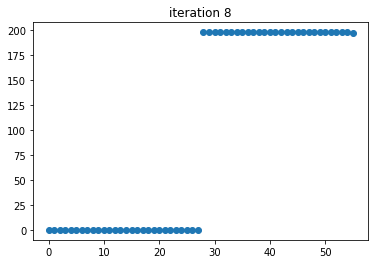

constraints for iteration 9 
 [510.77840571 510.77617844 510.77365261 510.77060165 510.76805758
 510.76708941 510.76602235 510.77840571 510.77506534 510.77127721
 510.76670126 510.76288564 510.7614335  510.75983312 510.77840571
 510.77395258 510.76890244 510.76280207 510.75771503 510.75577908
 510.75364566 510.77840571 510.76728306 510.75466843 510.73942917
 510.72672075 510.72188449 510.71655566   6.23589325   6.23588888
   6.23588393   6.23587795   6.23587297   6.23587107   6.23586898
   6.23589325   6.2358867    6.23587928   6.23587031   6.23586283
   6.23585999   6.23585685   6.23589325   6.23588452   6.23587462
   6.23586267   6.2358527    6.2358489    6.23584472   6.23589325
   6.23587145   6.23584673   6.23581686   6.23579195   6.23578247
   6.23577202   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.       

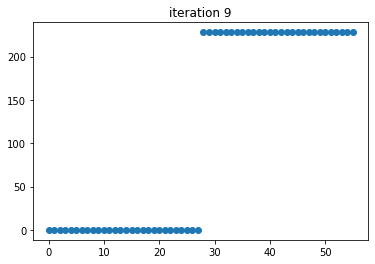

constraints for iteration 10 
 [495.2943908  495.29213453 495.2895945  495.28643656 495.2836681
 495.28257177 495.28130326 495.2943908  495.29100692 495.28719742
 495.28246101 495.27830897 495.27666471 495.27476221 495.2943908
 495.28987967 495.28480098 495.27848659 495.27295119 495.27075939
 495.26822308 495.2943908  495.28312277 495.27043615 495.25466223
 495.24083459 495.23535956 495.22902377   6.2051081    6.20510354
   6.20509841   6.20509203   6.20508643   6.20508422   6.20508165
   6.2051081    6.20510126   6.20509356   6.20508399   6.2050756
   6.20507228   6.20506843   6.2051081    6.20509899   6.20508872
   6.20507596   6.20506477   6.20506034   6.20505522   6.2051081
   6.20508533   6.20505969   6.20502781   6.20499986   6.20498879
   6.20497598   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          

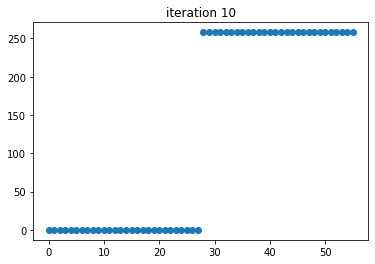

constraints for iteration 11 
 [482.34820496 482.34608386 482.3435529  482.34031775 482.33748754
 482.33636204 482.33504309 482.34820496 482.34502375 482.34122779
 482.33637559 482.33213068 482.33044262 482.32846445 482.34820496
 482.34396396 482.33890327 482.33243444 482.32677515 482.32452486
 482.32188731 482.34820496 482.33761094 482.32496841 482.30880734
 482.29466816 482.28904567 482.28245721   6.17862213   6.17861773
   6.17861248   6.17860576   6.17859989   6.17859755   6.17859482
   6.17862213   6.17861553   6.17860765   6.17859758   6.17858877
   6.17858527   6.17858116   6.17862213   6.17861333   6.17860283
   6.1785894    6.17857766   6.17857299   6.17856751   6.17862213
   6.17860015   6.17857391   6.17854037   6.17851102   6.17849935
   6.17848567   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.      

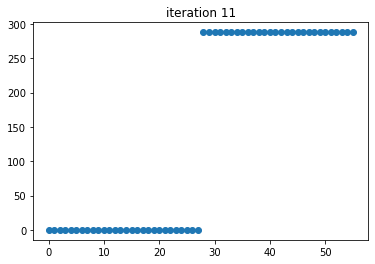

constraints for iteration 12 
 [471.56270663 471.5605445  471.55792654 471.55445781 471.55127936
 471.54999183 471.54849091 471.56270663 471.55946384 471.5555374
 471.55033487 471.54556778 471.54363671 471.54138568 471.56270663
 471.55838346 471.55314886 471.54621292 471.53985762 471.53728295
 471.53428228 471.56270663 471.55190694 471.53882914 471.52150142
 471.50562472 471.4991939  471.49169937   6.15600804   6.15600345
   6.15599789   6.15599053   6.15598378   6.15598105   6.15597786
   6.15600804   6.15600116   6.15599282   6.15598178   6.15597166
   6.15596756   6.15596278   6.15600804   6.15599886   6.15598775
   6.15597303   6.15595954   6.15595407   6.1559477    6.15600804
   6.15598511   6.15595735   6.15592056   6.15588686   6.1558732
   6.15585729   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.        

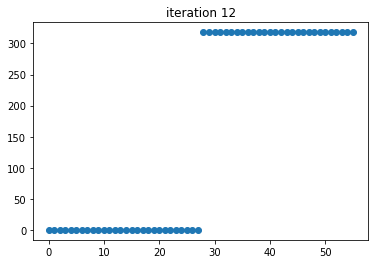

constraints for iteration 13 
 [462.37954651 462.37718012 462.37446918 462.37117175 462.36845456
 462.36743687 462.36631317 462.37954651 462.37599753 462.37193179
 462.3669864  462.36291123 462.36138488 462.35969978 462.37954651
 462.37481537 462.36939522 462.36280246 462.35736969 462.35533485
 462.35308839 462.37954651 462.36773078 462.35419344 462.3377261
 462.32415698 462.31907513 462.31346485   6.13634086   6.13633573
   6.13632987   6.13632273   6.13631684   6.13631464   6.13631221
   6.13634086   6.13633317   6.13632437   6.13631367   6.13630484
   6.13630154   6.13629789   6.13634086   6.13633062   6.13631888
   6.13630461   6.13629284   6.13628844   6.13628357   6.13634086
   6.13631528   6.13628597   6.13625031   6.13622093   6.13620992
   6.13619777   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.       

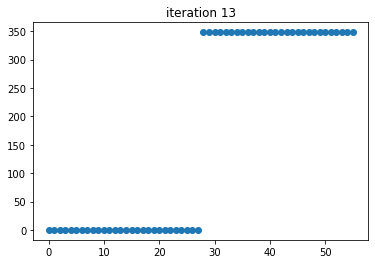

constraints for iteration 14 
 [454.43390509 454.43162557 454.42893208 454.42553534 454.42265013
 454.42155339 454.42033027 454.43390509 454.43048639 454.42644678
 454.42135228 454.41702523 454.41538034 454.41354593 454.43390509
 454.42934761 454.42396224 454.41717053 454.41140209 454.40920925
 454.4067639  454.43390509 454.42252236 454.40907064 454.39210586
 454.37769844 454.37222189 454.3661153    6.11900603   6.11900101
   6.11899508   6.1189876    6.11898124   6.11897882   6.11897613
   6.11900603   6.1189985    6.1189896    6.11897838   6.11896885
   6.11896523   6.11896118   6.11900603   6.11899599   6.11898413
   6.11896917   6.11895646   6.11895163   6.11894624   6.11900603
   6.11898096   6.11895132   6.11891395   6.1188822    6.11887014
   6.11885668   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.      

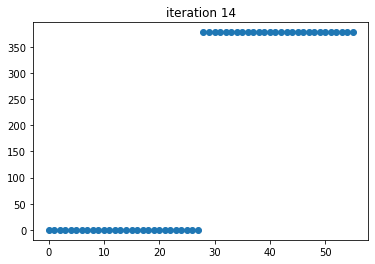

constraints for iteration 15 
 [447.5647871  447.56224006 447.55933961 447.55578354 447.55281037
 447.5516905  447.55045714 447.5647871  447.56096739 447.55661756
 447.55128424 447.54682525 447.54514573 447.54329607 447.5647871
 447.55969525 447.5538966  447.54678663 447.54084231 447.53860333
 447.53613761 447.5647871  447.55207373 447.53759342 447.51983556
 447.50498912 447.49939693 447.49323884   6.10377434   6.10376865
   6.10376216   6.10375421   6.10374756   6.10374505   6.10374229
   6.10377434   6.1037658    6.10375607   6.10374414   6.10373417
   6.10373041   6.10372627   6.10377434   6.10376296   6.10374999
   6.10373408   6.10372079   6.10371578   6.10371026   6.10377434
   6.10374591   6.10371352   6.1036738    6.10364058   6.10362807
   6.10361429   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.       

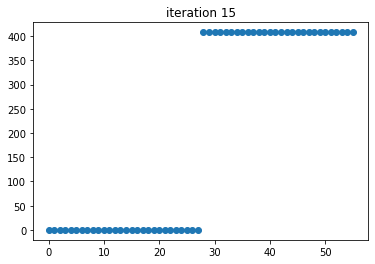

constraints for iteration 16 
 [441.45523979 441.45301213 441.45012202 441.4461418  441.44246995
 441.44098327 441.43924174 441.45523979 441.45189895 441.44756447
 441.44159529 441.43608859 441.43385887 441.43124703 441.45523979
 441.45078615 441.44500784 441.4370503  441.42970958 441.42673736
 441.42325531 441.45523979 441.44411744 441.4296868  441.40981484
 441.39148351 441.38406137 441.37536725   6.09002989   6.09002484
   6.09001828   6.09000926   6.09000093   6.08999756   6.08999361
   6.09002989   6.09002231   6.09001248   6.08999895   6.08998646
   6.0899814    6.08997548   6.09002989   6.09001979   6.09000669
   6.08998864   6.08997199   6.08996525   6.08995735   6.09002989
   6.09000467   6.08997194   6.08992687   6.08988529   6.08986845
   6.08984873   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.      

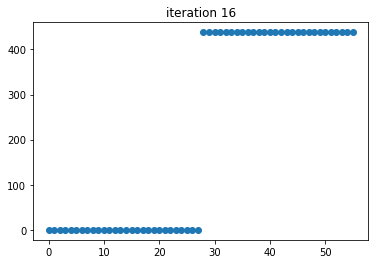

constraints for iteration 17 
 [436.16043073 436.15802401 436.15506272 436.15114349 436.14769148
 436.14637704 436.14494722 436.16043073 436.1568212  436.15237996
 436.14650191 436.14132462 436.13935347 436.13720931 436.16043073
 436.15561878 436.14969796 436.14186172 436.13495984 436.13233232
 436.12947366 436.16043073 436.14841155 436.13362274 436.11404995
 436.09681287 436.09025084 436.08311323   6.07796345   6.07795792
   6.07795113   6.07794213   6.07793421   6.07793119   6.07792791
   6.07796345   6.07795516   6.07794497   6.07793148   6.07791959
   6.07791507   6.07791014   6.07796345   6.0779524    6.07793881
   6.07792082   6.07790498   6.07789895   6.07789238   6.07796345
   6.07793586   6.07790191   6.07785698   6.0778174    6.07780233
   6.07778593   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.      

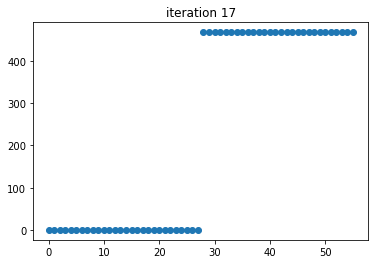

constraints for iteration 18 
 [431.44735208 431.4445948  431.44132909 431.43723579 431.43388932
 431.43269675 431.43145513 431.44735208 431.44321692 431.43831921
 431.43218036 431.42716196 431.42537341 431.4235112  431.44735208
 431.44183955 431.43531041 431.42712684 431.42043696 431.4180527
 431.4155697  431.44735208 431.43358538 431.41727982 431.39684332
 431.3801394  431.37418691 431.36799186   6.06709868   6.06709228
   6.0670847    6.0670752    6.06706744   6.06706467   6.06706179
   6.06709868   6.06708908   6.06707772   6.06706347   6.06705183
   6.06704768   6.06704336   6.06709868   6.06708589   6.06707074
   6.06705175   6.06703622   6.06703069   6.06702493   6.06709868
   6.06706673   6.0670289    6.06698147   6.0669427    6.06692889
   6.06691451   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.       

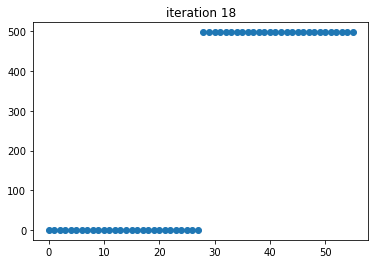

constraints for iteration 19 
 [427.30409071 427.30099605 427.29750618 427.29319293 427.28939352
 427.28785513 427.28604905 427.30409071 427.29944966 427.29421588
 427.28774718 427.28204919 427.27974212 427.27703346 427.30409071
 427.29790385 427.29092685 427.28230345 427.27470761 427.27163208
 427.26802132 427.30409071 427.28864142 427.27121927 427.24968523
 427.2307158  427.22303601 427.21402109   6.05744921   6.05744196
   6.05743378   6.05742368   6.05741477   6.05741117   6.05740694
   6.05744921   6.05743833   6.05742607   6.05741092   6.05739757
   6.05739216   6.05738581   6.05744921   6.05743471   6.05741837
   6.05739816   6.05738036   6.05737316   6.05736469   6.05744921
   6.05741301   6.05737219   6.05732173   6.05727727   6.05725927
   6.05723814   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.      

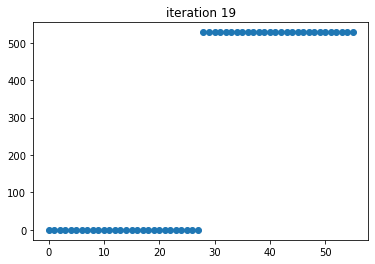

constraints for iteration 20 
 [423.6305329  423.62769734 423.62438143 423.62013724 423.61634489
 423.61483242 423.61310029 423.6305329  423.62628045 423.62130751
 423.61494232 423.60925492 423.60698666 423.60438911 423.6305329
 423.62486414 423.61823476 423.60974934 423.60216764 423.59914403
 423.59568164 423.6305329  423.61637785 423.59982249 423.57863172
 423.55970014 423.55215088 423.54350628   6.04881359   6.04880689
   6.04879905   6.04878902   6.04878006   6.04877649   6.04877239
   6.04881359   6.04880354   6.04879179   6.04877675   6.0487633
   6.04875794   6.0487518    6.04881359   6.04880019   6.04878453
   6.04876447   6.04874655   6.0487394    6.04873122   6.04881359
   6.04878014   6.04874101   6.04869092   6.04864616   6.04862831
   6.04860786   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.        

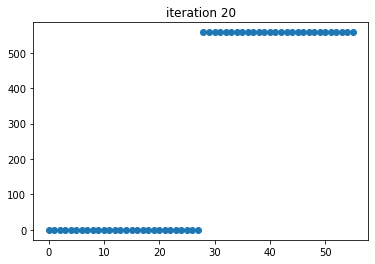

constraints for iteration 21 
 [420.25195045 420.24889741 420.2453428  420.24093436 420.23729663
 420.23594751 420.23447261 420.25195045 420.24737182 420.2420408
 420.23542945 420.2299738  420.22795049 420.22573876 420.25195045
 420.24584677 420.23873996 420.22992644 420.22265374 420.2199566
 420.21700889 420.25195045 420.23670861 420.21896036 420.19695036
 420.17879118 420.17205763 420.16470076   6.04080635   6.04079908
   6.04079061   6.04078011   6.04077144   6.04076823   6.04076471
   6.04080635   6.04079544   6.04078274   6.04076699   6.040754
   6.04074917   6.0407439    6.04080635   6.04079181   6.04077488
   6.04075388   6.04073656   6.04073013   6.0407231    6.04080635
   6.04077004   6.04072775   6.04067531   6.04063203   6.04061598
   6.04059844   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          

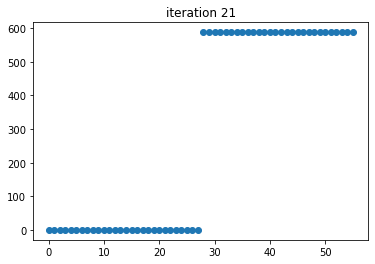

constraints for iteration 22 
 [417.2509481  417.24774762 417.24390609 417.23896553 417.23457177
 417.2328049  417.23074134 417.2509481  417.24614845 417.24038732
 417.23297808 417.22638885 417.22373901 417.22064477 417.2509481
 417.24454995 417.23687    417.22699297 417.21820918 417.21467689
 417.21055199 417.2509481  417.23497259 417.21579657 417.19113425
 417.16920328 417.16038476 417.15009024   6.03363773   6.03363005
   6.03362083   6.03360898   6.03359844   6.0335942    6.03358925
   6.03363773   6.03362621   6.03361239   6.03359461   6.0335788
   6.03357244   6.03356502   6.03363773   6.03362238   6.03360395
   6.03358025   6.03355917   6.03355069   6.0335408    6.03363773
   6.0335994    6.03355338   6.03349419   6.03344155   6.03342038
   6.03339567   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.        

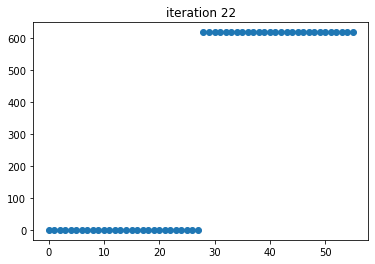

constraints for iteration 23 
 [414.5118289  414.50813893 414.50394069 414.49882134 414.49446423
 414.49276745 414.49085536 414.5118289  414.50629514 414.49999912
 414.49232172 414.48578783 414.48324309 414.48037569 414.5118289
 414.50445215 414.49605908 414.48582482 414.47711495 414.47372305
 414.46990105 414.5118289  414.49341026 414.47245453 414.44690254
 414.42515804 414.41669123 414.40715386   6.02705328   6.02704436
   6.02703422   6.02702186   6.02701134   6.02700724   6.02700262
   6.02705328   6.02703991   6.0270247    6.02700616   6.02699038
   6.02698423   6.02697731   6.02705328   6.02703546   6.02701519
   6.02699047   6.02696943   6.02696124   6.02695201   6.02705328
   6.02700879   6.02695817   6.02689644   6.0268439    6.02682345
   6.0268004    0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.       

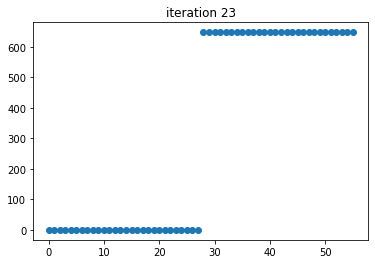

constraints for iteration 24 
 [412.12179791 412.11832629 412.11406379 412.10842066 412.10320832
 412.10107694 412.09859832 412.12179791 412.11659186 412.11019965
 412.10173691 412.09392027 412.09072405 412.08700734 412.12179791
 412.11485828 412.10633739 412.09505635 412.08463679 412.08037624
 412.07542215 412.12179791 412.10447527 412.08320435 412.05504159
 412.02903087 412.01839611 412.00603328   6.02126967   6.02126123
   6.02125088   6.02123717   6.02122451   6.02121933   6.02121331
   6.02126967   6.02125702   6.02124149   6.02122093   6.02120194
   6.02119418   6.02118515   6.02126967   6.02125281   6.02123211
   6.0212047    6.02117939   6.02116903   6.02115699   6.02126967
   6.02122758   6.0211759    6.02110747   6.02104425   6.0210184
   6.02098834   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.       

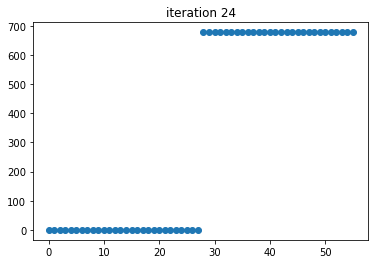

constraints for iteration 25 
 [409.91040434 409.90662053 409.90184699 409.89519281 409.88866049
 409.88585727 409.88245129 409.91040434 409.90472977 409.89757108
 409.88759201 409.8777961  409.87359254 409.86848512 409.91040434
 409.90283979 409.89329698 409.87999475 409.86693649 409.86133331
 409.85452636 409.91040434 409.89151597 409.86769055 409.83448142
 409.80188633 409.78790326 409.77091871   6.01588955   6.01588031
   6.01586865   6.01585239   6.01583644   6.01582959   6.01582127
   6.01588955   6.01587569   6.0158582    6.01583383   6.0158099
   6.01579964   6.01578716   6.01588955   6.01587107   6.01584776
   6.01581527   6.01578338   6.01576969   6.01575306   6.01588955
   6.01584341   6.01578521   6.01570408   6.01562443   6.01559026
   6.01554874   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.       

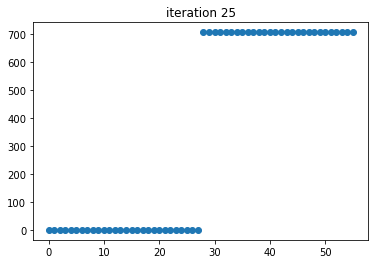

constraints for iteration 26 
 [407.91330985 407.90902845 407.90358046 407.89572065 407.88743951
 407.88367027 407.87894254 407.91330985 407.90688918 407.89871922
 407.88693247 407.87451431 407.86886253 407.86177431 407.91330985
 407.90475095 407.89386034 407.87814877 407.86159609 407.85406296
 407.84461613 407.91330985 407.89194197 407.86475539 407.8255372
 407.78422676 407.7654343  407.74187923   6.01100659   6.01099608
   6.01098271   6.01096342   6.0109431    6.01093385   6.01092225
   6.01100659   6.01099083   6.01097078   6.01094186   6.01091138
   6.0108975    6.0108801    6.01100659   6.01098559   6.01095886
   6.0109203    6.01087967   6.01086117   6.01083798   6.01100659
   6.01095415   6.01088742   6.01079114   6.0106897    6.01064353
   6.01058565   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.       

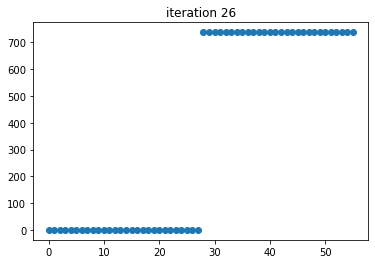

constraints for iteration 27 
 [406.11692673 406.1124665  406.10644595 406.09746948 406.08839039
 406.08456324 406.08006009 406.11692673 406.1102381  406.10120946
 406.08774851 406.07413447 406.068396   406.06164465 406.11692673
 406.10801079 406.09597556 406.07803253 406.05988694 406.05223869
 406.04324168 406.11692673 406.09467028 406.06462704 406.01984228
 405.97456996 405.95549694 405.93307129   6.00659142   6.00658042
   6.00656558   6.00654346   6.00652108   6.00651164   6.00650054
   6.00659142   6.00657493   6.00655268   6.00651949   6.00648593
   6.00647178   6.00645513   6.00659142   6.00656944   6.00653977
   6.00649554   6.0064508    6.00643194   6.00640975   6.00659142
   6.00653656   6.00646249   6.00635205   6.00624037   6.00619331
   6.00613794   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.      

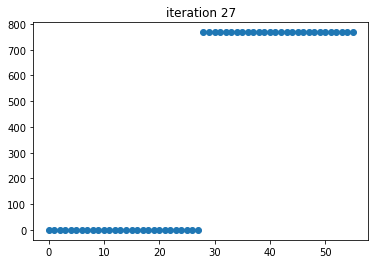

constraints for iteration 28 
 [404.44909198 404.44439652 404.43802933 404.42833758 404.41801676
 404.41346973 404.40797872 404.44909198 404.44205048 404.43250213
 404.41796907 404.40249422 404.39567706 404.38744601 404.44909198
 404.43970553 404.42697784 404.40760626 404.38698139 404.37789664
 404.36692886 404.44909198 404.42565955 404.39388968 404.34555073
 404.29411376 404.27147211 404.24416171   6.00247681   6.00246519
   6.00244944   6.00242545   6.00239991   6.00238865   6.00237506
   6.00247681   6.00245939   6.00243576   6.00239979   6.00236149
   6.00234461   6.00232423   6.00247681   6.00245359   6.00242209
   6.00237414   6.00232308   6.00230059   6.00227343   6.00247681
   6.00241882   6.00234018   6.0022205    6.00209308   6.00203696
   6.00196924   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.      

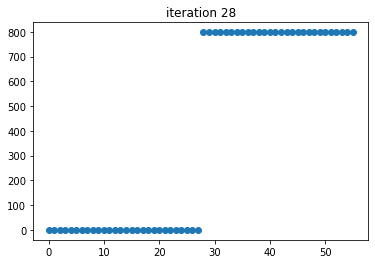

constraints for iteration 29 
 [403.00091596 402.99451216 402.985222   402.96892606 402.94767795
 402.93671048 402.92176988 403.00091596 402.99131242 402.97738076
 402.95294485 402.92108886 402.90464884 402.88226037 403.00091596
 402.98811426 402.96954343 402.93697253 402.89451926 402.87261449
 402.84279112 403.00091596 402.96895582 402.9226004  402.84133364
 402.73551345 402.68098261 402.60686037   5.99888844   5.99887254
   5.99884946   5.998809     5.99875622   5.99872898   5.99869187
   5.99888844   5.99886459   5.99882999   5.9987693    5.99869017
   5.99864932   5.99859368   5.99888844   5.99885665   5.99881052
   5.99872962   5.99862415   5.99856971   5.99849556   5.99888844
   5.99880906   5.9986939    5.99849195   5.99822878   5.99809302
   5.99790825   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.      

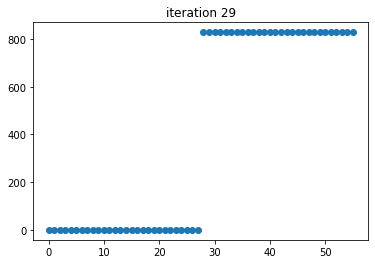

constraints for iteration 30 
 [401.71516247 401.70776413 401.69535674 401.67034315 401.63298373
 401.61162387 401.57995544 401.71516247 401.70406776 401.68546219
 401.64795847 401.59196439 401.559966   401.51256085 401.71516247
 401.70037327 401.67557328 401.62559066 401.55099138 401.50838301
 401.44530357 401.71516247 401.67824513 401.61636032 401.49173339
 401.30611956 401.20042524 401.044638     5.99569374   5.99567531
   5.99564442   5.99558215   5.99548915   5.99543597   5.99535709
   5.99569374   5.9956661    5.99561977   5.9955264    5.99538697
   5.99530725   5.99518903   5.99569374   5.9956569    5.99559514
   5.99547068   5.99528486   5.99517863   5.99502115   5.99569374
   5.99560178   5.99544762   5.99513704   5.99467368   5.9944091
   5.99401768   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.       

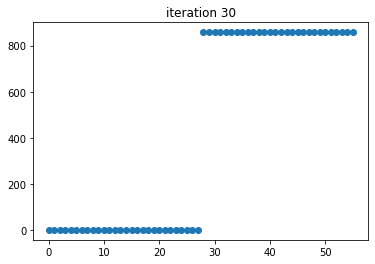

constraints for iteration 31 
 [401.38667388 401.36766461 401.32457844 401.20517757 400.964121
 400.79904161 400.52222345 401.38667388 401.35816896 401.29357051
 401.11462681 400.75372038 400.50688991 400.09373973 401.38667388
 401.34867926 401.26258898 401.02420794 400.54389811 400.21583701
 399.66771574 401.38667388 401.29186709 401.0772555  400.48443134
 399.29699803 398.4922441  397.16208602   5.99486747   5.9948202
   5.99471315   5.99441654   5.99381724   5.99340624   5.9927157
   5.99486747   5.99479659   5.99463606   5.99419137   5.99329312
   5.99267736   5.99164357   5.99486747   5.99477299   5.99455903
   5.9939664    5.99276966   5.99194963   5.99057391   5.99486747
   5.99463168   5.99409795   5.9926207    5.98964269   5.98760722
   5.98420768   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          

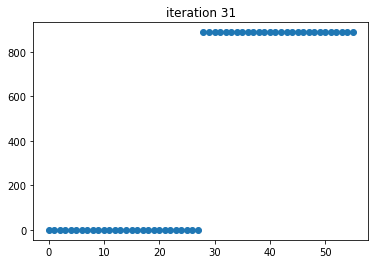

constraints for iteration 32 
 [404.62893229 404.56424319 404.39226592 403.84668466 402.61102377
 401.70621662 400.11889376 404.62893229 404.53193926 404.27416814
 403.45709451 401.61027552 400.26147926 397.90385474 404.62893229
 404.4996624  404.15622765 403.06852503 400.61494372 398.82767986
 395.71489075 404.62893229 404.30656531 403.45185915 400.7582349
 394.75436689 390.44829895 383.1070431    6.00288866   6.00272915
   6.00230511   6.00095864   5.99790047   5.99565318   5.99169377
   6.00288866   6.00264948   6.00201375   5.99999558   5.99541432
   5.99205058   5.98613304   6.00288866   6.00256987   6.00172266
   5.99903381   5.99293345   5.98845803   5.98059653   6.00288866
   6.00209343   5.99998191   5.99329013   5.97815767   5.96711116
   5.94787966   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.       

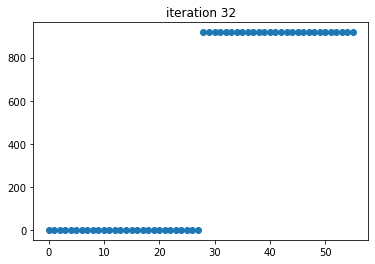

In [28]:
# #### calculate constriants order of mag 

for i in range(LatestIterI+1):
    
#     print(f'for index {i}')
    mom_np = Csv_to_Np(i, dat = 'moments')
#     print(mom_np.shape)
#     print()
    cons = calculate_constraints(mom_np)
    lam = lambda_np[i,:]
    print(f'constraints for iteration {i} \n {cons}')
    print()

    print(f'lagrange multipliers for iteration {i} \n {lam}')
    print()
    expvec = lam*cons
    el = len(expvec)
    print(f'exponent vector -  iteration {i} \n {expvec}')
    print()
#     print(lam.shape)
#     print(lam)
    plt.scatter(np.arange(el/2),expvec[int(el/2):])
#     plt.barh(lam*cons , cons_title)
    plt.title(f'iteration {i}')
    plt.show()

#     print(f'relative error of iteration {i} \n {cons/real_cons[:len(cons)]}')
#     print()
#     print()
#     print()


#     plt.plot(cons[:36], cons[:36])
#     plt.show()
#     plt.plot(cons[36:], cons[36:])
#     plt.show()
    
#     print(cons)
    
    
    
    

In [ ]:
(20000/50) - 100

In [ ]:
### Do the gradients converge? in other words, do they give the same constraints?  

In [ ]:
fn_1 = spec_folder +folder_out + 'convG_1moments_2.csv'
fn_2 = spec_folder +folder_out + 'convG_2moments_2.csv'
df1 = pd.read_csv(fn_1, sep = ',', header = None) 
df2 = pd.read_csv(fn_2, sep = ',', header = None) 


table1 = df1.to_numpy()
table2 = df2.to_numpy()


c1 = calculate_constraints(table1)
c2 = calculate_constraints(table2)


## calculate constraints 

In [ ]:
plt.scatter(c1[:36],c2[:36])
plt.plot(c1[:36], c1[:36])
plt.xlabel('Run 1 \n Means ')
plt.ylabel('Run 2 \n Means')

In [ ]:
plt.scatter(c1[36:],c2[36:])
plt.plot(c1[36:],c1[36:])
plt.xlabel('Run 1 \n 2nd moment ')
plt.ylabel('Run 2 \n 2nd moment')

In [ ]:
# how many samples ? 
table1.shape

In [ ]:
table2.shape

In [ ]:
cd('/Volumes/hodaakl')

In [ ]:
cd('Volumes/hodaakl')

In [ ]:
mod = .25
par_dict = {'par_name': ['k1', 'k2','k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12', 'k_tot_Akt', 'k_tot_foxo']
            , 'low_lim_log':np.array([  -0.2, -4.1, -2.5, -2.75, -.5, -1.5,-1.5, -6,-4.5, -1.5, -2.7 - mod, -2.7+ np.log10(1/2) - mod, 4.8 - mod, np.log10(710) - mod])
            , 'high_lim_log': np.array([ 0.2, -3.1, -1.5, -1.75,  .5, -.5, -.5, -5,-3.5, -.5,-2.7+ mod, -2.7+ np.log10(1/2)+ mod, 4.8+ mod, np.log10(710)+ mod])}

In [ ]:
for i in range(len(par_dict))